# Advanced Macroeconomics 1: Homework 1

## Settings

In [1]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization

import statsmodels.api as sm  # Statistical models
from statsmodels.tsa.stattools import adfuller, acf, pacf  # Time series analysis tools
from statsmodels.tsa.arima.model import ARIMA  # ARIMA model for time series forecasting

from statsmodels.graphics.tsaplots import plot_acf # Autocorrelation Function ( ACF )
from statsmodels.graphics.tsaplots import plot_pacf # Partial Autocorrelation Function (PACF
from statsmodels.stats.diagnostic import acorr_ljungbox

from collections import Counter

import seaborn as sns

import warnings

import ipeadatapy as ipea

import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


import random

seed = 42
np.random.seed(seed)
random.seed(seed)

In [2]:
rgb_color = (162 / 255, 37 / 255, 56 / 255)  # Red

In [3]:
warnings.filterwarnings("ignore")

## Questions

### Question 1
Using the data file **dados_hmw_1.xls** and the software of your choice, apply the **Box Jenkins** methodology. You should:



#### Data

In [5]:
# Load the data
file_path = r"dados_hmw_1.xls"
df = pd.read_excel(file_path)

# Set index to a RangeIndex
df.index = pd.RangeIndex(start=0, stop=len(df), step=1)

#### i. Plot the series

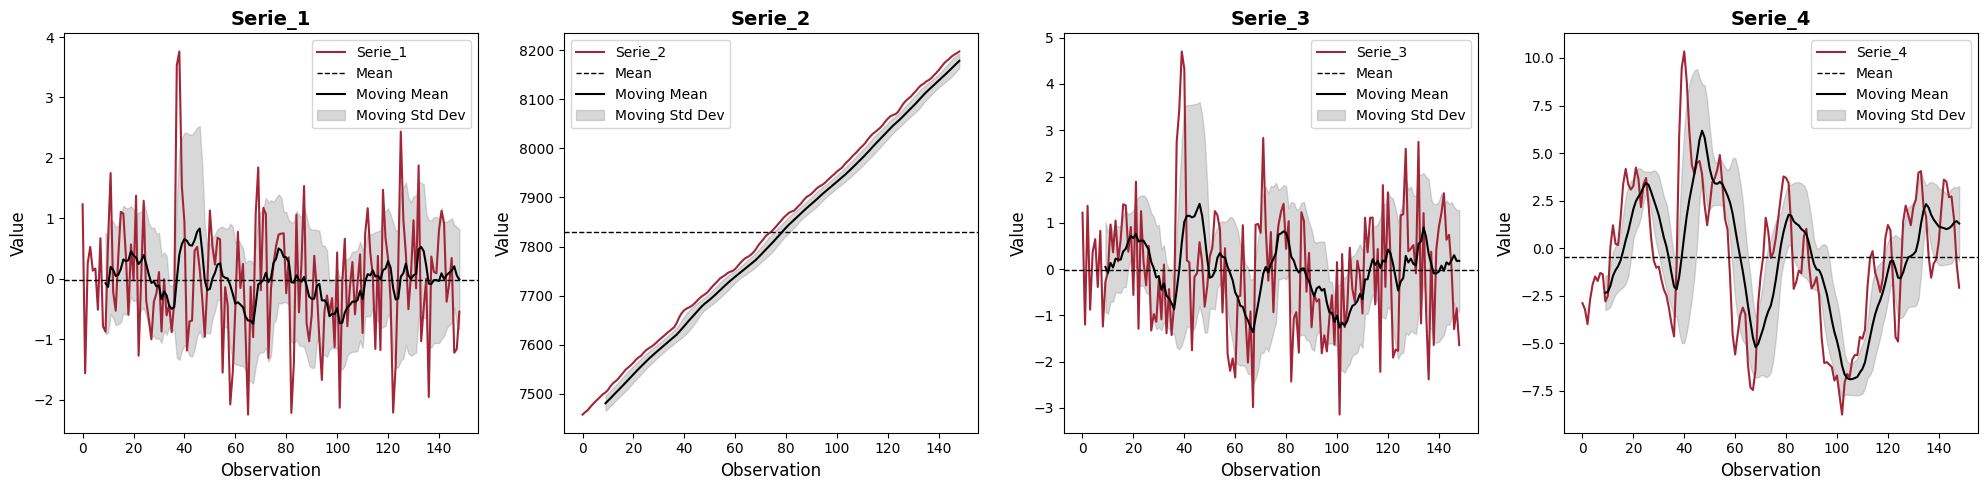

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel("dados_hmw_1.xls", sheet_name="Sheet1")

# Define the columns of the original series (assuming they are the first 4)
series_columns = df.columns[:4]

# Set the window size for the moving average and moving standard deviation
window_size = 10

# Create side-by-side subplots (1 row, one column for each series)
fig, axes = plt.subplots(1, len(series_columns), figsize=(5 * len(series_columns), 5), sharex=True)

# If there is only one series, wrap the axis in a list to maintain the loop
if len(series_columns) == 1:
    axes = [axes]

# Loop to generate the plot for each series
for ax, column in zip(axes, series_columns):
    # Calculate the moving average and moving standard deviation locally
    moving_mean = df[column].rolling(window=window_size).mean()
    moving_std = df[column].rolling(window=window_size).std()
    
    # Calculate the overall mean of the original series
    mean_value = df[column].mean()
    
    # Plot the original series
    ax.plot(df.index, df[column], label=column, color = rgb_color ,linewidth=1.5)
    
    # Draw a horizontal line indicating the mean
    ax.axhline(mean_value, color='black', linestyle='--', linewidth=1, label='Mean')
    
    # Plot the moving average
    ax.plot(df.index, moving_mean, color='black', linewidth=1.5, linestyle='-', label='Moving Mean')
    
    # Plot the moving standard deviation band
    ax.fill_between(df.index, moving_mean - moving_std, moving_mean + moving_std, 
                    color='grey', alpha=0.3, label='Moving Std Dev')
    
    # Remove background and extra borders using the current subplot (ax)
    ax.set_facecolor('white')         # Remove background color
    
    # Set title, labels, and grid
    ax.set_title(column, fontsize=14, fontweight='bold')
    ax.set_xlabel("Observation", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    ax.legend()
    ax.grid(False)

plt.tight_layout()
plt.show()


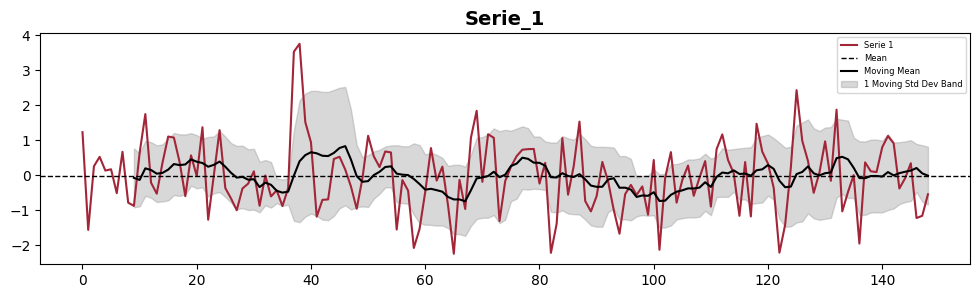

In [6]:
# Graph for specific serie
column = "Serie_1"

# Define the moving window size
window_size = 10

# Calculate moving average and moving standard deviation
df['Moving_Mean'] = df[column].rolling(window=window_size).mean() # Not using
df['Moving_Std'] = df[column].rolling(window=window_size).std()

# Calculate mean and standard deviation
mean_value = df[column].mean()
std_dev = df[column].std()

# Create the plot
plt.figure(figsize=(12, 3))
plt.plot(df.index, df[column], color=rgb_color, linewidth=1.5, label="Serie 1")
plt.axhline(mean_value, color='black', linestyle='--', linewidth=1, label='Mean')  # Dotted line for mean

# Plot standard deviation bands
#plt.fill_between(df.index, mean_value - std_dev, mean_value + std_dev, color='gray', alpha=0.3, label='1 Std Dev Band')

# Plot moving average
plt.plot(df.index, df['Moving_Mean'], color='black', linewidth=1.5, linestyle='-', label="Moving Mean")

# Plot moving standard deviation bands
plt.fill_between(df.index, 
                 df['Moving_Mean'] - df['Moving_Std'], 
                 df['Moving_Mean'] + df['Moving_Std'], 
                 color='grey', alpha=0.3, label='1 Moving Std Dev Band')

# Add titles and labels
plt.title(column, fontsize=14, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=14)
plt.legend(fontsize = 6)
plt.show()

- **Series 1**: The values seem to oscillate around a nearly constant mean (no clear growth or decline is observed over time).  
  The variance appears to be relatively stable.  
  In principle, it does not seem to show a significant trend.

- **Series 4**: There is a clearly increasing pattern, suggesting a strong positive deterministic trend.  
  We will likely need to remove or model this trend before applying the Box-Jenkins methodology.

- **Series 3**: Oscillates around a value close to 0 or 1.  
  Does not appear to show a pronounced trend.  
  The variance also seems reasonably stable.

- **Series 4**: Shows wider oscillations but without a clear upward or downward direction over time.  
  The variance does not seems reasonably stable  
  Apparently, there is also no defined trend.

In [7]:
from scipy.stats import ttest_ind

columns = ['Serie_1', 'Serie_2', 'Serie_3', 'Serie_4']

# Função auxiliar para calcular estatísticas
def get_stats(series):
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Std Dev': series.std(),
        'Variance': series.var(),
        'Range': series.max() - series.min(),
        'P10': series.quantile(0.10),
        'P40': series.quantile(0.40),
        'P70': series.quantile(0.70)
    }

for col in columns:
    serie = df[col].dropna()
    mid = len(serie) // 2

    first_half = serie.iloc[:mid]
    second_half = serie.iloc[mid:]

    # Estatísticas
    full_stats = get_stats(serie)
    first_stats = get_stats(first_half)
    second_stats = get_stats(second_half)

    # Teste t
    t_stat, p_value = ttest_ind(first_half, second_half, equal_var=False)

    # Impressão organizada
    print(f'\n{"-"*15} Statistics for {col} {"-"*15}')
    print(f'{"Stat":<15} {"Full":>10} {"First Half":>15} {"Second Half":>15}')
    for stat in full_stats:
        print(f'{stat:<15} {full_stats[stat]:>10.2f} {first_stats[stat]:>15.2f} {second_stats[stat]:>15.2f}')
    
    # Teste t
    print(f'{"t-statistic":<15} {"":>10} {"":>15} {t_stat:>15.2f}')
    print(f'{"p-value":<15} {"":>10} {"":>15} {p_value:>15.4f}')
    if p_value < 0.05:
        print(f'{"":<15} {"":>10} {"":>15} ➤ Significant difference (p < 0.05). We reject H₀ and accept H₁: the means are statistically different')
    else:
        print(f'{"":<15} {"":>10} {"":>15} ➤ No significant difference (p ≥ 0.05). We fail to reject H₀: the means are not statistically different')



--------------- Statistics for Serie_1 ---------------
Stat                  Full      First Half     Second Half
Mean                 -0.02            0.05           -0.09
Median               -0.07           -0.06           -0.07
Std Dev               1.01            1.08            0.94
Variance              1.02            1.16            0.89
Range                 6.01            6.01            4.65
P10                  -1.19           -1.13           -1.20
P40                  -0.27           -0.31           -0.25
P70                   0.43            0.53            0.38
t-statistic                                           0.85
p-value                                             0.3978
                                           ➤ No significant difference (p ≥ 0.05). We fail to reject H₀: the means are not statistically different

--------------- Statistics for Serie_2 ---------------
Stat                  Full      First Half     Second Half
Mean               7829.54       

#### ii. Check whether the series exhibit a trend. If they do, you must use one of two approaches before proceeding:
- Remove it before applying the BJ methodology.  
- Include the trend, if applicable, in the model estimation.

Testing for Stationarity Using the Dickey-Fuller Method

In [8]:
# Options for the regression parameter:
# 'c'   : constant only (default)
# 'ct'  : constant and trend
# 'ctt' : constant, trend, and quadratic trend
# 'nc'  : no constant, no trend

# Analyze Serie_1
print("=== Analyzing Serie_1 ===")
result_serie1 = adfuller(df['Serie_1'].dropna(), regression='c')
adf_stat1 = result_serie1[0]
p_value1 = result_serie1[1]
print(f'ADF Statistic: {adf_stat1}')
print(f'p-value: {p_value1}')
if p_value1 > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")

# Analyze Serie_2
print("\n=== Analyzing Serie_2 ===")
result_serie2 = adfuller(df['Serie_2'].dropna(), regression='ct')
adf_stat2 = result_serie2[0]
p_value2 = result_serie2[1]
print(f'ADF Statistic: {adf_stat2}')
print(f'p-value: {p_value2}')
if p_value2 > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")

# Analyze Serie_3
print("\n=== Analyzing Serie_3 ===")
result_serie3 = adfuller(df['Serie_3'].dropna(), regression='c')
adf_stat3 = result_serie3[0]
p_value3 = result_serie3[1]
print(f'ADF Statistic: {adf_stat3}')
print(f'p-value: {p_value3}')
if p_value3 > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")

# Analyze Serie_4
print("\n=== Analyzing Serie_4 ===")
result_serie4 = adfuller(df['Serie_4'].dropna(), regression='c')
adf_stat4 = result_serie4[0]
p_value4 = result_serie4[1]
print(f'ADF Statistic: {adf_stat4}')
print(f'p-value: {p_value4}')
if p_value4 > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")

=== Analyzing Serie_1 ===
ADF Statistic: -7.405184861084389
p-value: 7.376670858801128e-11
-> The series is stationary (p-value ≤ 0.05).

=== Analyzing Serie_2 ===
ADF Statistic: -2.8013069307310876
p-value: 0.1964648332562457
-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.

=== Analyzing Serie_3 ===
ADF Statistic: -2.9953509948447343
p-value: 0.03533084568526292
-> The series is stationary (p-value ≤ 0.05).

=== Analyzing Serie_4 ===
ADF Statistic: -2.6518448490730724
p-value: 0.08274826274708713
-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.


#### iiii. Apply the Box-Jenkins methodology: identify, estimate, and verify (conduct diagnostic tests)

##### Step 1: Identification

In this identification step, we define the AR (p) and MA (q) parameters for each series based on their stationarity and the approach used for trend treatment:

- Series 1:
  - The series is stationary (ADF test passed).
  - We directly analyze the ACF and PACF plots to identify the AR (p) and MA (q) terms.

- Series 2:
  - The original series was non-stationary; we choose to include a drift (trend) in the model.
  - We incorporate a trend term (drift) and then analyze the ACF and PACF plots of the residuals or directly adjust an ARIMA(p,0,q) model with drift.

- Series 3:
  - The series is stationary (ADF test passed).
  - We use the ACF and PACF plots of the original series to identify the AR (p) and MA (q) terms.

- Series 4:
  - Instead of differencing, we will remove the trend by applying the first difference .
  - With the differenced (now stationary) series, we analyze the ACF and PACF plots to determine the p and q parameters, resulting in an ARIMA(p,1,q) model for the original series.

In [10]:
# Removing the trend by applying the first difference for serie 4
df['Serie_2_diff'] = df['Serie_2'].diff(1)
df['Serie_2_diff'] = df['Serie_2_diff'].dropna()


result_2_diff = adfuller(df['Serie_2_diff'].dropna())
print("ADF Statistic:", result_2_diff[0])
p_value_2_diff = result_2_diff[1]
print("p-value:", p_value_2_diff)
if p_value_2_diff > 0.05:
    print("- The series is NOT stationary (p-value > 0.05). Further differencing or modeling steps may be required.")
else:
    print("- The series is stationary (p-value ≤ 0.05).")


ADF Statistic: -3.1108693332234796
p-value: 0.025759196298212814
- The series is stationary (p-value ≤ 0.05).


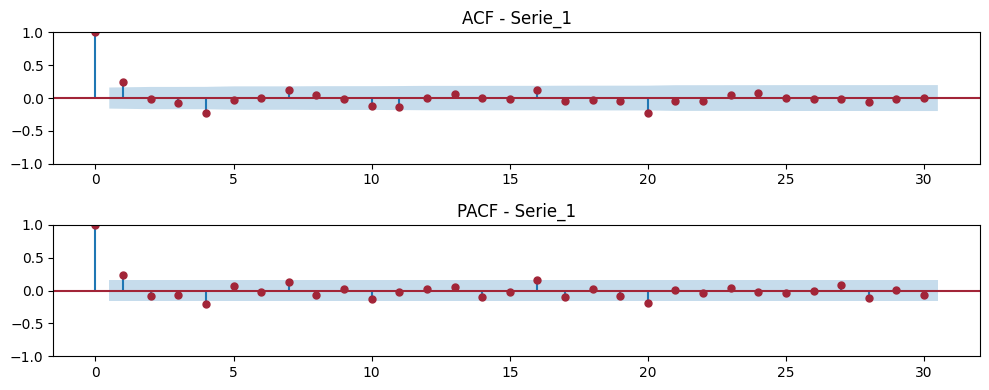

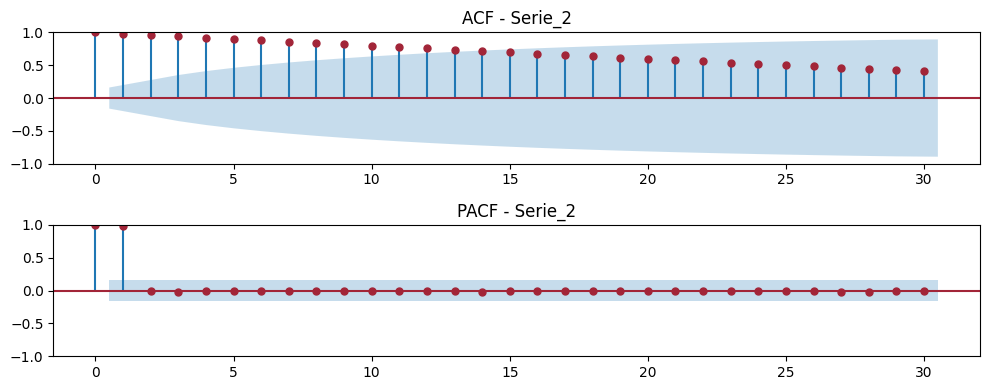

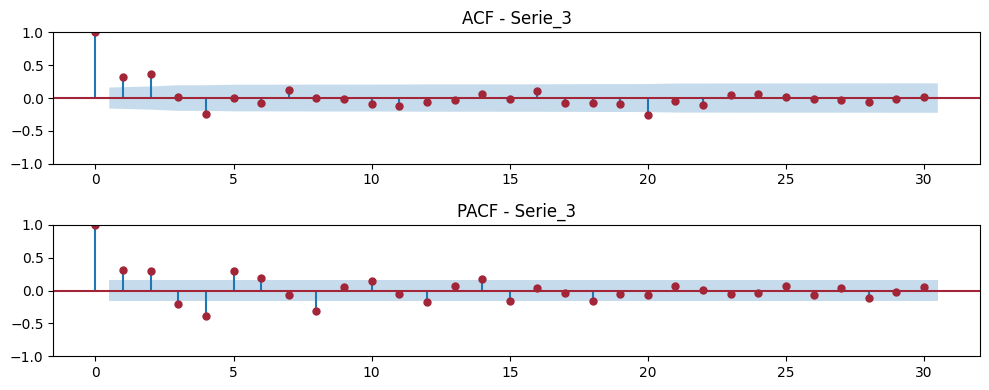

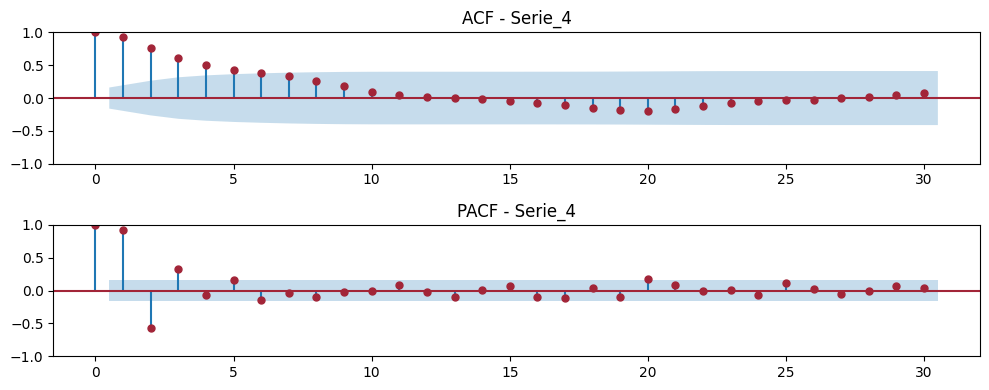

In [11]:
# Autocorrelation Function ( ACF ) and Partial Autocorrelation Function (PACF)

columns = ['Serie_1', 'Serie_2', 'Serie_3', 'Serie_4']

for col in columns:
    plt.figure(figsize=(10, 4))
    
    # Plot ACF
    ax1 = plt.subplot(211)
    plot_acf(df[col].dropna(), lags=30, color = rgb_color,ax=ax1, title=f'ACF - {col}')
    
    # Plot PACF
    ax2 = plt.subplot(212)
    plot_pacf(df[col].dropna(), lags=30,color = rgb_color ,ax=ax2, title=f'PACF - {col}')
    
    plt.tight_layout()
    plt.show()

##### Step 2: Estimation and Step 3: Diagnostic Checking

========================== Serie 1 ==========================================


All model results sorted by AIC:

ARIMA(1, 0, 1) [trend='n'] - AIC: 417.97 | BIC: 426.98 | HQIC: 421.63 | Ljung-Box p: 0.3205 → ✅ White noise
ARIMA(0, 0, 1) [trend='n'] - AIC: 419.07 | BIC: 425.08 | HQIC: 421.51 | Ljung-Box p: 0.2420 → ✅ White noise
ARIMA(1, 0, 1) [trend='t'] - AIC: 419.64 | BIC: 431.65 | HQIC: 424.52 | Ljung-Box p: 0.3095 → ✅ White noise
ARIMA(1, 0, 1) [trend='c'] - AIC: 419.93 | BIC: 431.95 | HQIC: 424.81 | Ljung-Box p: 0.3205 → ✅ White noise
ARIMA(1, 0, 0) [trend='n'] - AIC: 420.02 | BIC: 426.03 | HQIC: 422.46 | Ljung-Box p: 0.2337 → ✅ White noise
ARIMA(3, 0, 2) [trend='n'] - AIC: 420.55 | BIC: 438.58 | HQIC: 427.88 | Ljung-Box p: 0.7811 → ✅ White noise
ARIMA(2, 0, 2) [trend='n'] - AIC: 420.7 | BIC: 435.72 | HQIC: 426.8 | Ljung-Box p: 0.3687 → ✅ White noise
ARIMA(0, 0, 1) [trend='t'] - AIC: 420.8 | BIC: 429.82 | HQIC: 424.47 | Ljung-Box p: 0.2333 → ✅ White noise
ARIMA(0, 0, 2) [trend='n'] - AIC: 420.84 | BIC: 429.85 | HQIC: 424.5 | Ljung-Box p: 0.2077 → ✅ White noi

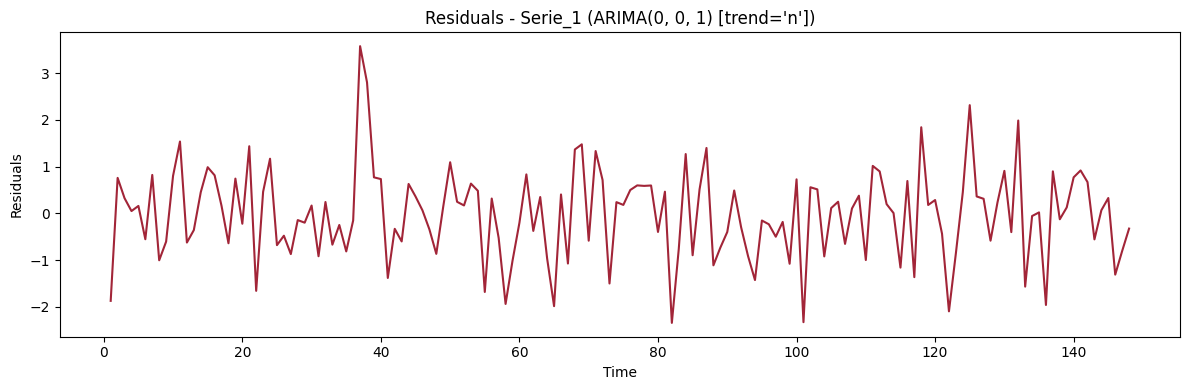

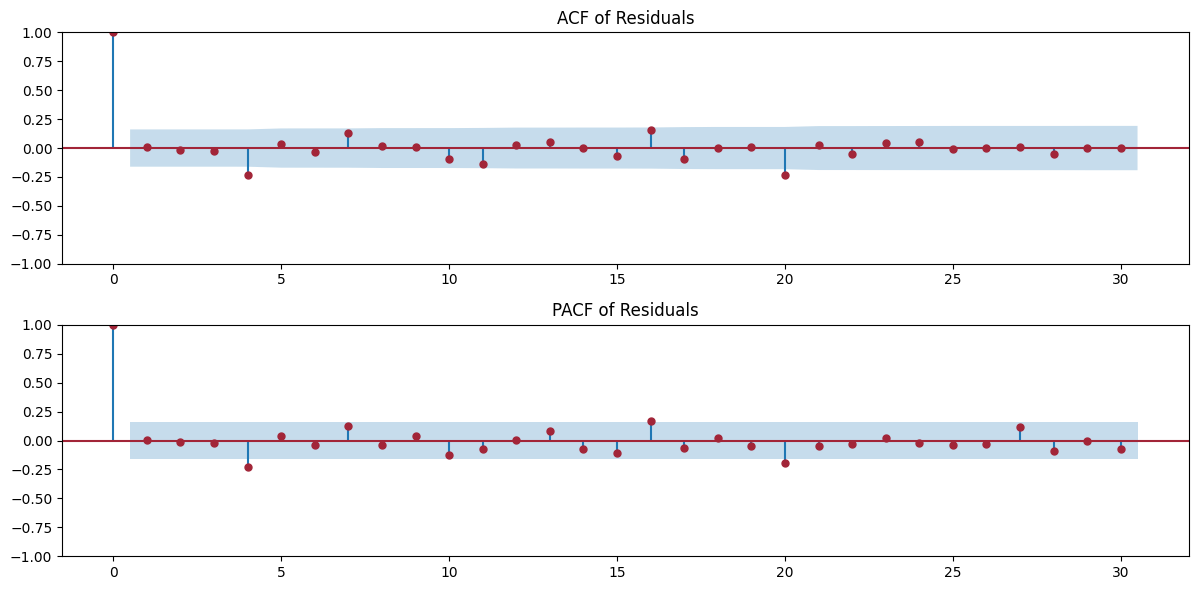


Ljung-Box p-value (lag 10): 0.2420
✅ Residuals are white noise.


In [45]:
# -----------------------------
# Dectecting the order of ARIMA model using ACF and PACF plots
# -----------------------------
serie_name = 'Serie_1'
train_perc = 1  # Use 1.0 for full data

# Split data
serie = df[serie_name].dropna()
split_index = int(len(serie) * train_perc)
train = serie.iloc[:split_index]
test = serie.iloc[split_index:]

# Candidate params
p_values = [0, 1, 2, 3]
d_values = [0, 1]
q_values = [0, 1, 2, 3]
trend_types = ['n','c', 't', 'ct']

# Estimate models
results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            for trend_type in trend_types:
                # Skip invalid trend combinations for given d
                if d == 1 and trend_type in ['c', 'ct']:
                    continue
                elif d >= 2 and trend_type != 'n':
                    continue
                try:
                    model = ARIMA(train, order=(p, d, q), trend=trend_type).fit()
                    residuals = model.resid.dropna()
                    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
                    p_value = lb_test['lb_pvalue'].iloc[0]
                    white_noise = p_value > 0.05
                    results.append({
                        'order': (p, d, q),
                        'trend': trend_type,
                        'aic': model.aic,
                        'bic': model.bic,
                        'hqic': model.hqic,
                        'ljung_pvalue': p_value,
                        'white_noise': white_noise,
                        'model': model
                    })
                except Exception as e:
                    print(f"Error fitting ARIMA({p},{d},{q}) with trend='{trend_type}': {e}")



# Print all models
print("\nAll model results sorted by AIC:\n")
for res in sorted(results, key=lambda x: x['aic']):
    status = "✅ White noise" if res['white_noise'] else "⚠️ Autocorr."
    print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
          f"AIC: {round(res['aic'], 2)} | BIC: {round(res['bic'], 2)} | "
          f"HQIC: {round(res['hqic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} → {status}")

# Filter only valid models (white noise)
valid_results = [res for res in results if res['white_noise']]

if not valid_results:
    print("\n⚠️ No model passed the white noise residual test (Ljung-Box p > 0.05 at lag 10).")
else:
    print("\n✅ Models with white noise residuals sorted by AIC:\n")
    for res in sorted(valid_results, key=lambda x: x['aic']):
        print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
              f"AIC: {round(res['aic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} ✅")

    # Best models from valid ones
    best_aic_model = min(valid_results, key=lambda x: x['aic'])
    best_bic_model = min(valid_results, key=lambda x: x['bic'])
    best_hqic_model = min(valid_results, key=lambda x: x['hqic'])

    print("\n--- Best models (with white noise residuals) per criterion ---")
    print(f"Lowest AIC   -> ARIMA{best_aic_model['order']} [trend='{best_aic_model['trend']}']")
    print(f"Lowest BIC   -> ARIMA{best_bic_model['order']} [trend='{best_bic_model['trend']}']")
    print(f"Lowest HQIC  -> ARIMA{best_hqic_model['order']} [trend='{best_hqic_model['trend']}']")

    # Consensus check
    consensus_models = [
        (best_aic_model['order'], best_aic_model['trend']),
        (best_bic_model['order'], best_bic_model['trend']),
        (best_hqic_model['order'], best_hqic_model['trend'])
    ]
    counts = Counter(consensus_models)
    most_common_model, freq = counts.most_common(1)[0]

    if freq > 1:
        print(f"\n🏆 The model ARIMA{most_common_model[0]} [trend='{most_common_model[1]}'] is the best in {freq}/3 criteria.")
        for res in valid_results:
            if res['order'] == most_common_model[0] and res['trend'] == most_common_model[1]:
                print("\n--- Summary of the most common best model ---")
                print(res['model'].summary())

                # Residual plot
                residuals = res['model'].resid.dropna()[1:]
                plt.figure(figsize=(12, 4))
                plt.plot(residuals, color=rgb_color)
                plt.title(f"Residuals - {serie_name} (ARIMA{res['order']} [trend='{res['trend']}'])")
                plt.xlabel("Time")
                plt.ylabel("Residuals")
                plt.tight_layout()
                plt.show()

                # ACF/PACF
                fig, axs = plt.subplots(2, 1, figsize=(12, 6))
                plot_acf(residuals, lags=30, ax=axs[0], color=rgb_color)
                axs[0].set_title("ACF of Residuals")
                plot_pacf(residuals, lags=30, ax=axs[1], color=rgb_color)
                axs[1].set_title("PACF of Residuals")
                plt.tight_layout()
                plt.show()

                # Ljung-Box result
                print(f"\nLjung-Box p-value (lag 10): {res['ljung_pvalue']:.4f}")
                print("✅ Residuals are white noise.")
    else:
        print("\nNo single model dominates in all criteria among valid models.")

========================== Serie 2 ==========================================


All model results sorted by AIC:

ARIMA(2, 0, 1) [trend='ct'] - AIC: 427.11 | BIC: 445.14 | HQIC: 434.44 | Ljung-Box p: 0.8652 → ✅ White noise
ARIMA(1, 0, 2) [trend='ct'] - AIC: 427.55 | BIC: 445.58 | HQIC: 434.88 | Ljung-Box p: 0.8095 → ✅ White noise
ARIMA(1, 0, 1) [trend='ct'] - AIC: 428.73 | BIC: 443.75 | HQIC: 434.83 | Ljung-Box p: 0.3387 → ✅ White noise
ARIMA(2, 0, 2) [trend='ct'] - AIC: 428.91 | BIC: 449.94 | HQIC: 437.45 | Ljung-Box p: 0.8685 → ✅ White noise
ARIMA(1, 0, 1) [trend='t'] - AIC: 455.96 | BIC: 467.98 | HQIC: 460.85 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(2, 0, 2) [trend='c'] - AIC: 459.94 | BIC: 477.97 | HQIC: 467.27 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(2, 0, 0) [trend='ct'] - AIC: 476.01 | BIC: 491.03 | HQIC: 482.11 | Ljung-Box p: 0.0071 → ⚠️ Autocorr.
ARIMA(0, 0, 2) [trend='ct'] - AIC: 509.64 | BIC: 524.66 | HQIC: 515.75 | Ljung-Box p: 0.0000 → ⚠️ Autocorr.
ARIMA(2, 0, 1) [trend='c'] - AIC: 530.57 | BIC: 545.59 | HQIC: 536.67 | Ljung-Box p: 1.0000 → ✅ W

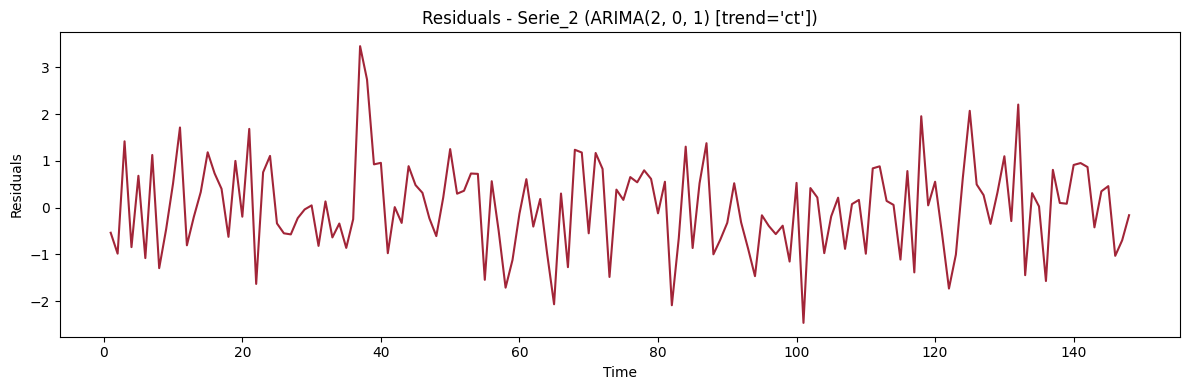

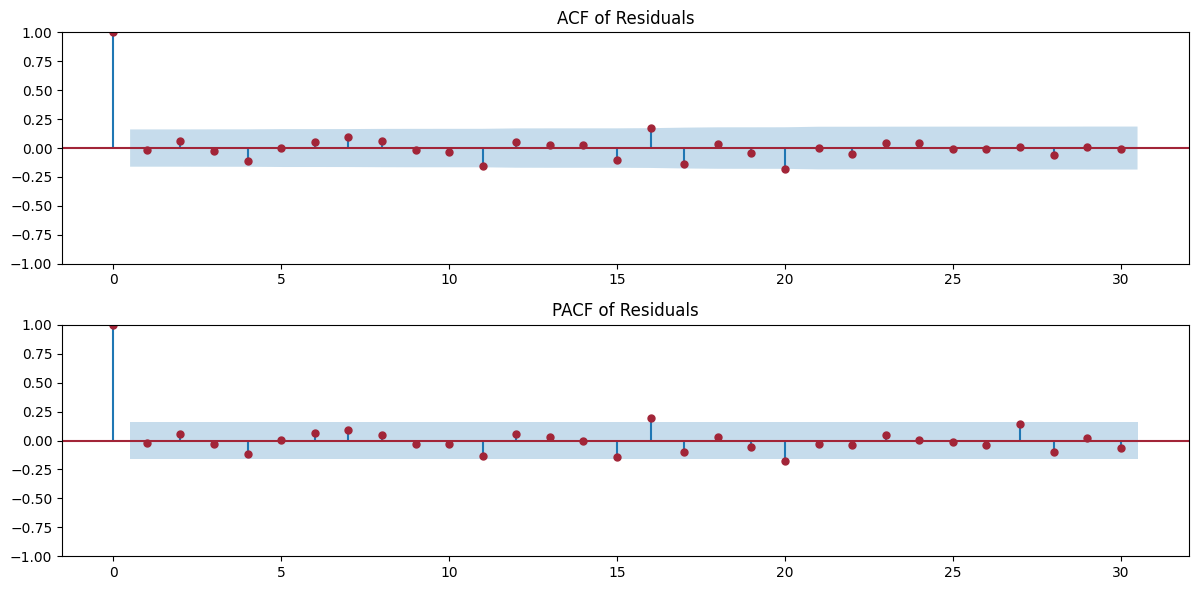


Ljung-Box p-value (lag 10): 0.8652
✅ Residuals are white noise.


In [47]:
# -----------------------------
# Dectecting the order of ARIMA model using ACF and PACF plots
# -----------------------------
serie_name = 'Serie_2'
train_perc = 1  # Use 1.0 for full data

# Split data
serie = df[serie_name].dropna()
split_index = int(len(serie) * train_perc)
train = serie.iloc[:split_index]
test = serie.iloc[split_index:]

# Candidate params
p_values = [0, 1, 2]
d_values = [0]
q_values = [0, 1, 2]
trend_types = ['n','c', 't', 'ct']

# Estimate models
results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            for trend_type in trend_types:
                # Skip invalid trend combinations for given d
                if d == 1 and trend_type in ['c', 'ct']:
                    continue
                elif d >= 2 and trend_type != 'n':
                    continue
                try:
                    model = ARIMA(train, order=(p, d, q), trend=trend_type).fit()
                    residuals = model.resid.dropna()
                    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
                    p_value = lb_test['lb_pvalue'].iloc[0]
                    white_noise = p_value > 0.05
                    results.append({
                        'order': (p, d, q),
                        'trend': trend_type,
                        'aic': model.aic,
                        'bic': model.bic,
                        'hqic': model.hqic,
                        'ljung_pvalue': p_value,
                        'white_noise': white_noise,
                        'model': model
                    })
                except Exception as e:
                    print(f"Error fitting ARIMA({p},{d},{q}) with trend='{trend_type}': {e}")



# Print all models
print("\nAll model results sorted by AIC:\n")
for res in sorted(results, key=lambda x: x['aic']):
    status = "✅ White noise" if res['white_noise'] else "⚠️ Autocorr."
    print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
          f"AIC: {round(res['aic'], 2)} | BIC: {round(res['bic'], 2)} | "
          f"HQIC: {round(res['hqic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} → {status}")

# Filter only valid models (white noise)
valid_results = [res for res in results if res['white_noise']]

if not valid_results:
    print("\n⚠️ No model passed the white noise residual test (Ljung-Box p > 0.05 at lag 10).")
else:
    print("\n✅ Models with white noise residuals sorted by AIC:\n")
    for res in sorted(valid_results, key=lambda x: x['aic']):
        print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
              f"AIC: {round(res['aic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} ✅")

    # Best models from valid ones
    best_aic_model = min(valid_results, key=lambda x: x['aic'])
    best_bic_model = min(valid_results, key=lambda x: x['bic'])
    best_hqic_model = min(valid_results, key=lambda x: x['hqic'])

    print("\n--- Best models (with white noise residuals) per criterion ---")
    print(f"Lowest AIC   -> ARIMA{best_aic_model['order']} [trend='{best_aic_model['trend']}']")
    print(f"Lowest BIC   -> ARIMA{best_bic_model['order']} [trend='{best_bic_model['trend']}']")
    print(f"Lowest HQIC  -> ARIMA{best_hqic_model['order']} [trend='{best_hqic_model['trend']}']")

    # Consensus check
    consensus_models = [
        (best_aic_model['order'], best_aic_model['trend']),
        (best_bic_model['order'], best_bic_model['trend']),
        (best_hqic_model['order'], best_hqic_model['trend'])
    ]
    counts = Counter(consensus_models)
    most_common_model, freq = counts.most_common(1)[0]

    if freq > 1:
        print(f"\n🏆 The model ARIMA{most_common_model[0]} [trend='{most_common_model[1]}'] is the best in {freq}/3 criteria.")
        for res in valid_results:
            if res['order'] == most_common_model[0] and res['trend'] == most_common_model[1]:
                print("\n--- Summary of the most common best model ---")
                print(res['model'].summary())

                # Residual plot
                residuals = res['model'].resid.dropna()[1:]
                plt.figure(figsize=(12, 4))
                plt.plot(residuals, color=rgb_color)
                plt.title(f"Residuals - {serie_name} (ARIMA{res['order']} [trend='{res['trend']}'])")
                plt.xlabel("Time")
                plt.ylabel("Residuals")
                plt.tight_layout()
                plt.show()

                # ACF/PACF
                fig, axs = plt.subplots(2, 1, figsize=(12, 6))
                plot_acf(residuals, lags=30, ax=axs[0], color=rgb_color)
                axs[0].set_title("ACF of Residuals")
                plot_pacf(residuals, lags=30, ax=axs[1], color=rgb_color)
                axs[1].set_title("PACF of Residuals")
                plt.tight_layout()
                plt.show()

                # Ljung-Box result
                print(f"\nLjung-Box p-value (lag 10): {res['ljung_pvalue']:.4f}")
                print("✅ Residuals are white noise.")
    else:
        print("\nNo single model dominates in all criteria among valid models.")

========================== Serie 3 ==========================================


All model results sorted by AIC:

ARIMA(1, 0, 2) [trend='n'] - AIC: 424.15 | BIC: 436.16 | HQIC: 429.03 | Ljung-Box p: 0.2154 → ✅ White noise
ARIMA(2, 0, 2) [trend='n'] - AIC: 424.89 | BIC: 439.91 | HQIC: 431.0 | Ljung-Box p: 0.3059 → ✅ White noise
ARIMA(1, 0, 2) [trend='t'] - AIC: 425.89 | BIC: 440.91 | HQIC: 431.99 | Ljung-Box p: 0.2057 → ✅ White noise
ARIMA(1, 0, 2) [trend='c'] - AIC: 426.12 | BIC: 441.14 | HQIC: 432.22 | Ljung-Box p: 0.2160 → ✅ White noise
ARIMA(2, 0, 2) [trend='t'] - AIC: 426.6 | BIC: 444.63 | HQIC: 433.93 | Ljung-Box p: 0.2957 → ✅ White noise
ARIMA(2, 0, 2) [trend='c'] - AIC: 426.86 | BIC: 444.89 | HQIC: 434.19 | Ljung-Box p: 0.3064 → ✅ White noise
ARIMA(1, 0, 2) [trend='ct'] - AIC: 427.62 | BIC: 445.64 | HQIC: 434.94 | Ljung-Box p: 0.1964 → ✅ White noise
ARIMA(2, 0, 2) [trend='ct'] - AIC: 428.29 | BIC: 449.32 | HQIC: 436.83 | Ljung-Box p: 0.2826 → ✅ White noise
ARIMA(0, 0, 2) [trend='n'] - AIC: 428.41 | BIC: 437.43 | HQIC: 432.08 | Ljung-Box p: 0.0643 → ✅ White

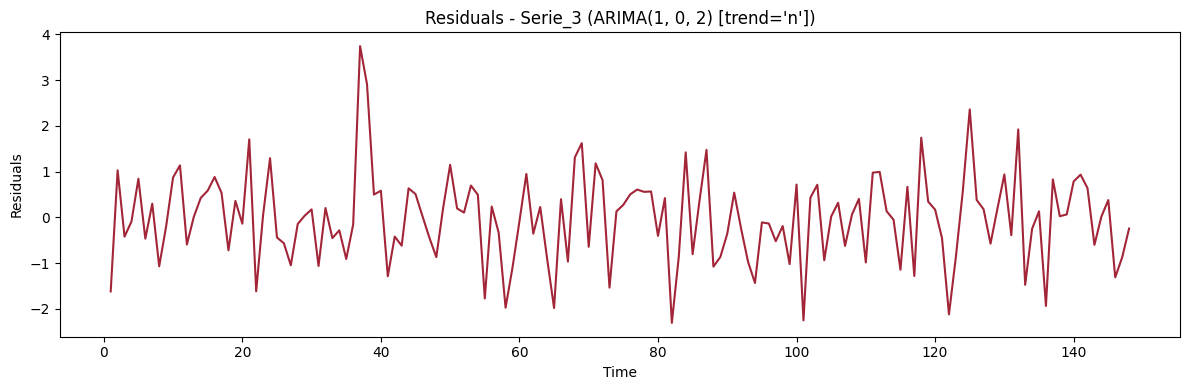

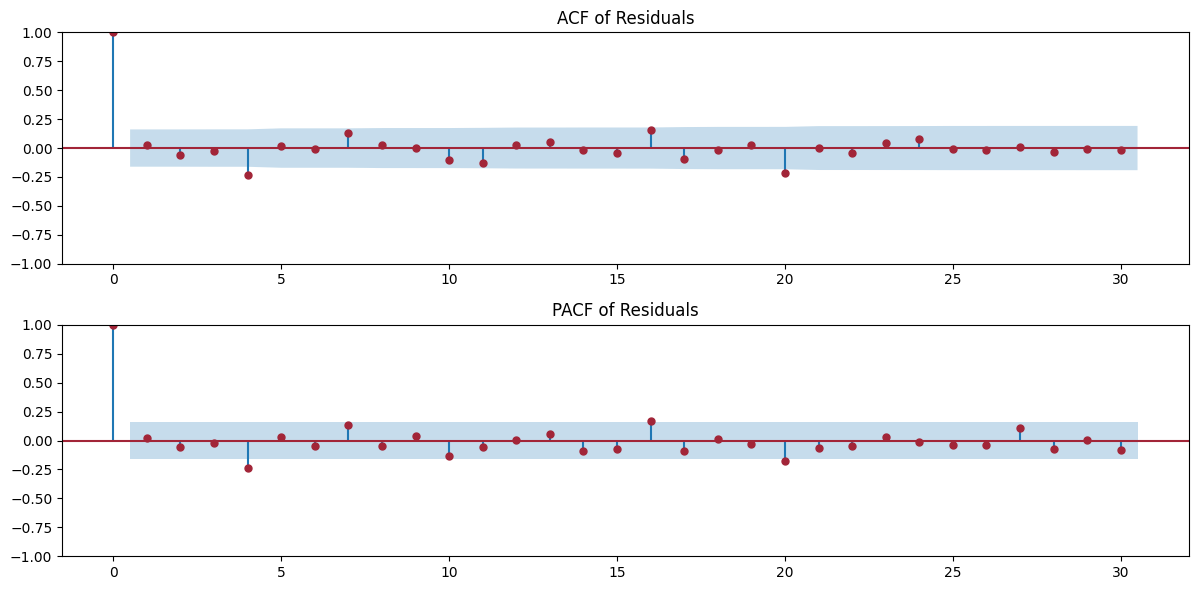


Ljung-Box p-value (lag 10): 0.2154
✅ Residuals are white noise.


In [48]:
# -----------------------------
# Dectecting the order of ARIMA model using ACF and PACF plots
# -----------------------------
serie_name = 'Serie_3'
train_perc = 1  # Use 1.0 for full data

# Split data
serie = df[serie_name].dropna()
split_index = int(len(serie) * train_perc)
train = serie.iloc[:split_index]
test = serie.iloc[split_index:]

# Candidate params
p_values = [0, 1, 2]
d_values = [0]
q_values = [0, 1, 2]
trend_types = ['n','c', 't', 'ct']

# Estimate models
results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            for trend_type in trend_types:
                # Skip invalid trend combinations for given d
                if d == 1 and trend_type in ['c', 'ct']:
                    continue
                elif d >= 2 and trend_type != 'n':
                    continue
                try:
                    model = ARIMA(train, order=(p, d, q), trend=trend_type).fit()
                    residuals = model.resid.dropna()
                    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
                    p_value = lb_test['lb_pvalue'].iloc[0]
                    white_noise = p_value > 0.05
                    results.append({
                        'order': (p, d, q),
                        'trend': trend_type,
                        'aic': model.aic,
                        'bic': model.bic,
                        'hqic': model.hqic,
                        'ljung_pvalue': p_value,
                        'white_noise': white_noise,
                        'model': model
                    })
                except Exception as e:
                    print(f"Error fitting ARIMA({p},{d},{q}) with trend='{trend_type}': {e}")



# Print all models
print("\nAll model results sorted by AIC:\n")
for res in sorted(results, key=lambda x: x['aic']):
    status = "✅ White noise" if res['white_noise'] else "⚠️ Autocorr."
    print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
          f"AIC: {round(res['aic'], 2)} | BIC: {round(res['bic'], 2)} | "
          f"HQIC: {round(res['hqic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} → {status}")

# Filter only valid models (white noise)
valid_results = [res for res in results if res['white_noise']]

if not valid_results:
    print("\n⚠️ No model passed the white noise residual test (Ljung-Box p > 0.05 at lag 10).")
else:
    print("\n✅ Models with white noise residuals sorted by AIC:\n")
    for res in sorted(valid_results, key=lambda x: x['aic']):
        print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
              f"AIC: {round(res['aic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} ✅")

    # Best models from valid ones
    best_aic_model = min(valid_results, key=lambda x: x['aic'])
    best_bic_model = min(valid_results, key=lambda x: x['bic'])
    best_hqic_model = min(valid_results, key=lambda x: x['hqic'])

    print("\n--- Best models (with white noise residuals) per criterion ---")
    print(f"Lowest AIC   -> ARIMA{best_aic_model['order']} [trend='{best_aic_model['trend']}']")
    print(f"Lowest BIC   -> ARIMA{best_bic_model['order']} [trend='{best_bic_model['trend']}']")
    print(f"Lowest HQIC  -> ARIMA{best_hqic_model['order']} [trend='{best_hqic_model['trend']}']")

    # Consensus check
    consensus_models = [
        (best_aic_model['order'], best_aic_model['trend']),
        (best_bic_model['order'], best_bic_model['trend']),
        (best_hqic_model['order'], best_hqic_model['trend'])
    ]
    counts = Counter(consensus_models)
    most_common_model, freq = counts.most_common(1)[0]

    if freq > 1:
        print(f"\n🏆 The model ARIMA{most_common_model[0]} [trend='{most_common_model[1]}'] is the best in {freq}/3 criteria.")
        for res in valid_results:
            if res['order'] == most_common_model[0] and res['trend'] == most_common_model[1]:
                print("\n--- Summary of the most common best model ---")
                print(res['model'].summary())

                # Residual plot
                residuals = res['model'].resid.dropna()[1:]
                plt.figure(figsize=(12, 4))
                plt.plot(residuals, color=rgb_color)
                plt.title(f"Residuals - {serie_name} (ARIMA{res['order']} [trend='{res['trend']}'])")
                plt.xlabel("Time")
                plt.ylabel("Residuals")
                plt.tight_layout()
                plt.show()

                # ACF/PACF
                fig, axs = plt.subplots(2, 1, figsize=(12, 6))
                plot_acf(residuals, lags=30, ax=axs[0], color=rgb_color)
                axs[0].set_title("ACF of Residuals")
                plot_pacf(residuals, lags=30, ax=axs[1], color=rgb_color)
                axs[1].set_title("PACF of Residuals")
                plt.tight_layout()
                plt.show()

                # Ljung-Box result
                print(f"\nLjung-Box p-value (lag 10): {res['ljung_pvalue']:.4f}")
                print("✅ Residuals are white noise.")
    else:
        print("\nNo single model dominates in all criteria among valid models.")

========================== Serie 4 ==========================================


All model results sorted by AIC:

ARIMA(2, 0, 1) [trend='t'] - AIC: 425.11 | BIC: 440.13 | HQIC: 431.22 | Ljung-Box p: 0.8652 → ✅ White noise
ARIMA(2, 0, 1) [trend='c'] - AIC: 425.27 | BIC: 440.29 | HQIC: 431.37 | Ljung-Box p: 0.8625 → ✅ White noise
ARIMA(2, 1, 2) [trend='t'] - AIC: 425.3 | BIC: 443.29 | HQIC: 432.61 | Ljung-Box p: 0.8566 → ✅ White noise
ARIMA(1, 0, 2) [trend='t'] - AIC: 425.55 | BIC: 440.57 | HQIC: 431.66 | Ljung-Box p: 0.8094 → ✅ White noise
ARIMA(1, 0, 2) [trend='c'] - AIC: 425.68 | BIC: 440.7 | HQIC: 431.79 | Ljung-Box p: 0.8091 → ✅ White noise
ARIMA(1, 1, 2) [trend='t'] - AIC: 426.63 | BIC: 441.61 | HQIC: 432.72 | Ljung-Box p: 0.3371 → ✅ White noise
ARIMA(1, 0, 1) [trend='t'] - AIC: 426.73 | BIC: 438.75 | HQIC: 431.62 | Ljung-Box p: 0.3404 → ✅ White noise
ARIMA(1, 0, 1) [trend='c'] - AIC: 426.82 | BIC: 438.84 | HQIC: 431.71 | Ljung-Box p: 0.3352 → ✅ White noise
ARIMA(2, 0, 2) [trend='t'] - AIC: 426.91 | BIC: 444.93 | HQIC: 434.23 | Ljung-Box p: 0.8686 → ✅ White n

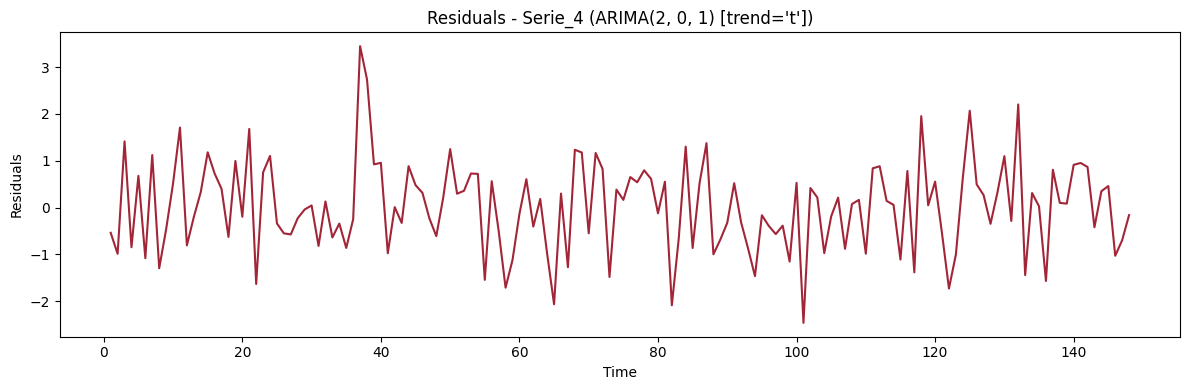

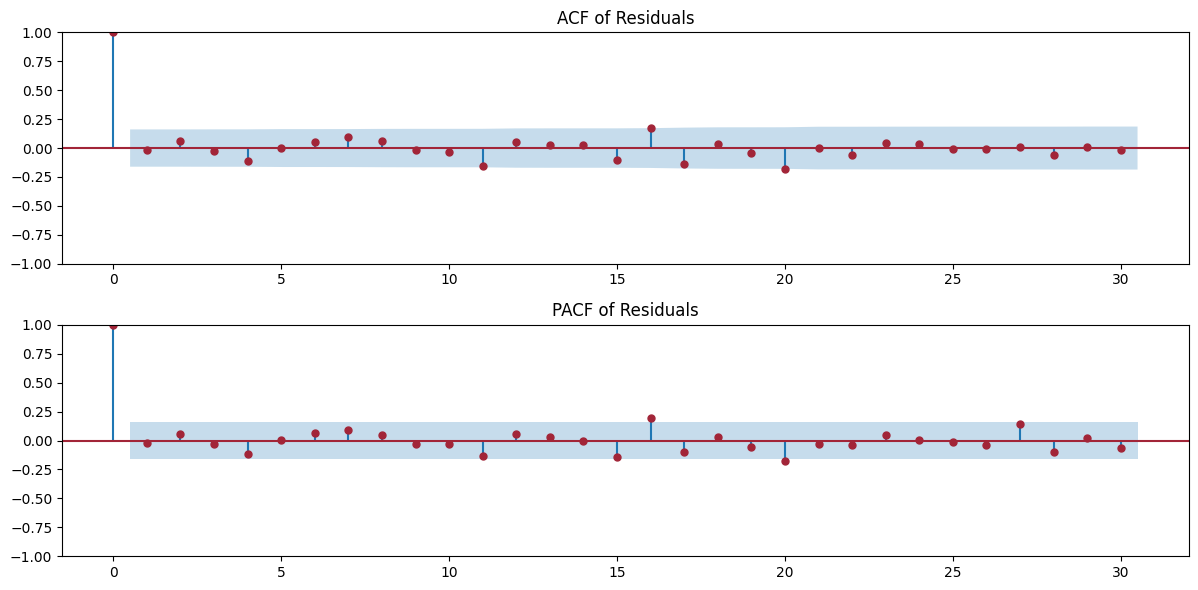


Ljung-Box p-value (lag 10): 0.8652
✅ Residuals are white noise.


In [51]:
# -----------------------------
# Dectecting the order of ARIMA model using ACF and PACF plots
# -----------------------------
serie_name = 'Serie_4'
train_perc = 1  # Use 1.0 for full data

# Split data
serie = df[serie_name].dropna()
split_index = int(len(serie) * train_perc)
train = serie.iloc[:split_index]
test = serie.iloc[split_index:]

# Candidate params
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
trend_types = ['c', 't', 'ct']

# Estimate models
results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            for trend_type in trend_types:
                # Skip invalid trend combinations for given d
                if d == 1 and trend_type in ['c', 'ct']:
                    continue
                elif d >= 2 and trend_type != 'n':
                    continue
                try:
                    model = ARIMA(train, order=(p, d, q), trend=trend_type).fit()
                    residuals = model.resid.dropna()
                    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
                    p_value = lb_test['lb_pvalue'].iloc[0]
                    white_noise = p_value > 0.05
                    results.append({
                        'order': (p, d, q),
                        'trend': trend_type,
                        'aic': model.aic,
                        'bic': model.bic,
                        'hqic': model.hqic,
                        'ljung_pvalue': p_value,
                        'white_noise': white_noise,
                        'model': model
                    })
                except Exception as e:
                    print(f"Error fitting ARIMA({p},{d},{q}) with trend='{trend_type}': {e}")



# Print all models
print("\nAll model results sorted by AIC:\n")
for res in sorted(results, key=lambda x: x['aic']):
    status = "✅ White noise" if res['white_noise'] else "⚠️ Autocorr."
    print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
          f"AIC: {round(res['aic'], 2)} | BIC: {round(res['bic'], 2)} | "
          f"HQIC: {round(res['hqic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} → {status}")

# Filter only valid models (white noise)
valid_results = [res for res in results if res['white_noise']]

if not valid_results:
    print("\n⚠️ No model passed the white noise residual test (Ljung-Box p > 0.05 at lag 10).")
else:
    print("\n✅ Models with white noise residuals sorted by AIC:\n")
    for res in sorted(valid_results, key=lambda x: x['aic']):
        print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
              f"AIC: {round(res['aic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} ✅")

    # Best models from valid ones
    best_aic_model = min(valid_results, key=lambda x: x['aic'])
    best_bic_model = min(valid_results, key=lambda x: x['bic'])
    best_hqic_model = min(valid_results, key=lambda x: x['hqic'])

    print("\n--- Best models (with white noise residuals) per criterion ---")
    print(f"Lowest AIC   -> ARIMA{best_aic_model['order']} [trend='{best_aic_model['trend']}']")
    print(f"Lowest BIC   -> ARIMA{best_bic_model['order']} [trend='{best_bic_model['trend']}']")
    print(f"Lowest HQIC  -> ARIMA{best_hqic_model['order']} [trend='{best_hqic_model['trend']}']")

    # Consensus check
    consensus_models = [
        (best_aic_model['order'], best_aic_model['trend']),
        (best_bic_model['order'], best_bic_model['trend']),
        (best_hqic_model['order'], best_hqic_model['trend'])
    ]
    counts = Counter(consensus_models)
    most_common_model, freq = counts.most_common(1)[0]

    if freq > 1:
        print(f"\n🏆 The model ARIMA{most_common_model[0]} [trend='{most_common_model[1]}'] is the best in {freq}/3 criteria.")
        for res in valid_results:
            if res['order'] == most_common_model[0] and res['trend'] == most_common_model[1]:
                print("\n--- Summary of the most common best model ---")
                print(res['model'].summary())

                # Residual plot
                residuals = res['model'].resid.dropna()[1:]
                plt.figure(figsize=(12, 4))
                plt.plot(residuals, color=rgb_color)
                plt.title(f"Residuals - {serie_name} (ARIMA{res['order']} [trend='{res['trend']}'])")
                plt.xlabel("Time")
                plt.ylabel("Residuals")
                plt.tight_layout()
                plt.show()

                # ACF/PACF
                fig, axs = plt.subplots(2, 1, figsize=(12, 6))
                plot_acf(residuals, lags=30, ax=axs[0], color=rgb_color)
                axs[0].set_title("ACF of Residuals")
                plot_pacf(residuals, lags=30, ax=axs[1], color=rgb_color)
                axs[1].set_title("PACF of Residuals")
                plt.tight_layout()
                plt.show()

                # Ljung-Box result
                print(f"\nLjung-Box p-value (lag 10): {res['ljung_pvalue']:.4f}")
                print("✅ Residuals are white noise.")
    else:
        print("\nNo single model dominates in all criteria among valid models.")

### Question 2

#### i. Retrieve the following data from the IPEADATA website:
- (i) Gross Domestic Product (GDP) at market prices: chained index (average 1995 = 100);
- (ii) IPCA - general - index (Dec. 1993 = 100).

Plot the series.

In [ ]:
# Here we use a keyword to search for available time series or browse them manually on the IPEA website
ipea.metadata()

# GDP series
ipea.describe('SCN104_PIBPM104')

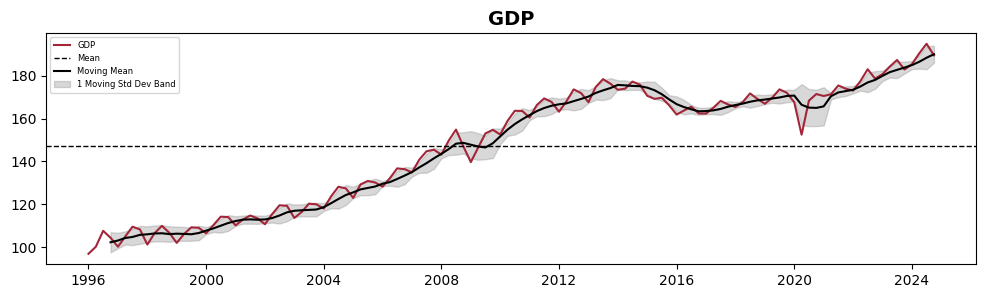

In [5]:
gdp = ipea.timeseries('SCN104_PIBPM104')

gdp = gdp.rename(columns={
    'RAW DATE': 'date',
    'VALUE (-)': 'GDP',
    'CODE': 'code',
    'DAY': 'day',
    'MONTH': 'month',
    'YEAR': 'year'
})
################ Plot ################

column = "GDP"

# Define the moving window size
window_size = 4

# Calculate moving average and moving standard deviation
gdp['Moving_Mean'] = gdp[column].rolling(window=window_size).mean()
gdp['Moving_Std'] = gdp[column].rolling(window=window_size).std()

# Calculate mean and standard deviation
mean_value = gdp[column].mean()
std_dev = gdp[column].std()

# Create the plot
plt.figure(figsize=(12, 3))
plt.plot(gdp.index, gdp[column], color=rgb_color, linewidth=1.5, label="GDP")
plt.axhline(mean_value, color='black', linestyle='--', linewidth=1, label='Mean')  # Dotted line for mean

# Plot standard deviation bands
#plt.fill_between(gdp.index, mean_value - std_dev, mean_value + std_dev, color='gray', alpha=0.3, label='1 Std Dev Band')

# Plot moving average
plt.plot(gdp.index, gdp['Moving_Mean'], color='black', linewidth=1.5, linestyle='-', label="Moving Mean")

# Plot moving standard deviation bands
plt.fill_between(gdp.index, 
                 gdp['Moving_Mean'] - gdp['Moving_Std'], 
                 gdp['Moving_Mean'] + gdp['Moving_Std'], 
                 color='grey', alpha=0.3, label='1 Moving Std Dev Band')

# Add titles and labels
plt.title(column, fontsize=14, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=14)
plt.legend(fontsize = 6)
plt.show()

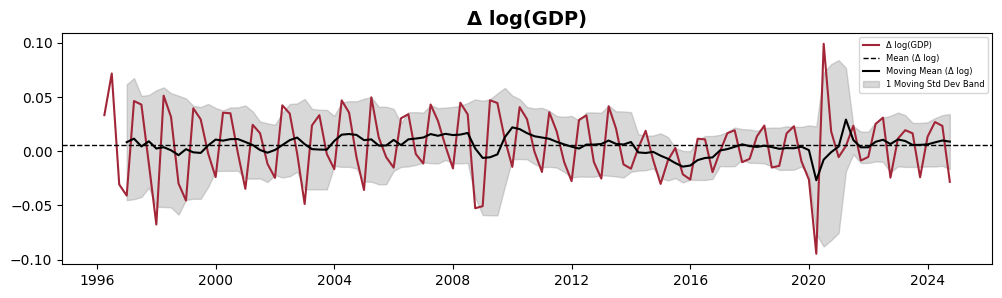

In [6]:
gdp = ipea.timeseries('SCN104_PIBPM104')

gdp = gdp.rename(columns={
    'RAW DATE': 'date',
    'VALUE (-)': 'GDP',
    'CODE': 'code',
    'DAY': 'day',
    'MONTH': 'month',
    'YEAR': 'year'
})

################ Plot Growth Rate ################
# ------ Difference of logs over time represents the growth rate ------

column = "GDP"

# Apply log transformation to the GDP column
gdp['Log_GDP'] = np.log(gdp[column])

# Calculate the first difference of the log
gdp['Log_Diff'] = gdp['Log_GDP'].diff()

# Define the moving window size
window_size = 4

# Calculate moving average and moving standard deviation of the differenced log series
gdp['Moving_Mean'] = gdp['Log_Diff'].rolling(window=window_size).mean()
gdp['Moving_Std'] = gdp['Log_Diff'].rolling(window=window_size).std()

# Calculate overall mean and standard deviation of the differenced log series
mean_value = gdp['Log_Diff'].mean()
std_dev = gdp['Log_Diff'].std()

# Create the plot
plt.figure(figsize=(12, 3))

# Plot the differenced log series
plt.plot(gdp.index, gdp['Log_Diff'], color=rgb_color, linewidth=1.5, label="Δ log(GDP)")

# Horizontal line for the overall mean
plt.axhline(mean_value, color='black', linestyle='--', linewidth=1, label='Mean (Δ log)')

# Plot the moving average
plt.plot(gdp.index, gdp['Moving_Mean'], color='black', linewidth=1.5, linestyle='-', label="Moving Mean (Δ log)")

# Plot the moving standard deviation band
plt.fill_between(gdp.index, 
                 gdp['Moving_Mean'] - gdp['Moving_Std'], 
                 gdp['Moving_Mean'] + gdp['Moving_Std'], 
                 color='grey', alpha=0.3, label='1 Moving Std Dev Band')

# Add title and legend
plt.title('Δ log(' + column + ')', fontsize=14, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=14)
plt.legend(fontsize=6)
plt.show()

In [ ]:
# IPCA series
ipea.timeseries('PRECOS12_IPCA12')

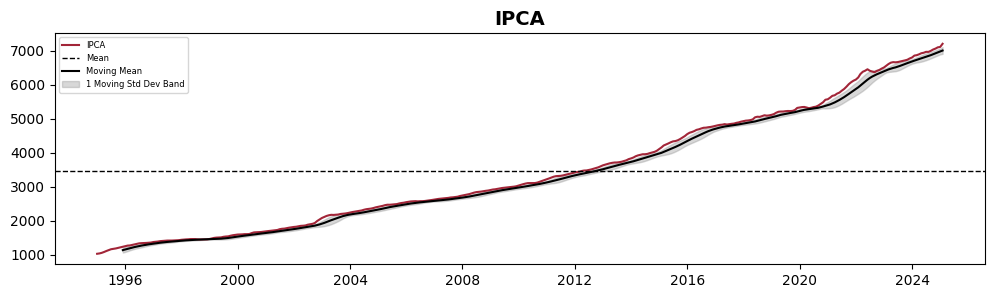

In [8]:
ipca = ipea.timeseries('PRECOS12_IPCA12')

ipca = ipca.rename(columns={
    'RAW DATE': 'date',
    'VALUE (-)': 'IPCA',
    'CODE': 'code',
    'DAY': 'day',
    'MONTH': 'month',
    'YEAR': 'year'
})
################ Plot ################


column = "IPCA"

ipca = ipca[ipca.index >= '1995-01-01']

# Define the moving window size
window_size = 12

# Calculate moving average and moving standard deviation
ipca['Moving_Mean'] = ipca[column].rolling(window=window_size).mean()
ipca['Moving_Std'] = ipca[column].rolling(window=window_size).std()

# Calculate mean and standard deviation
mean_value = ipca[column].mean()
std_dev = ipca[column].std()

# Create the plot
plt.figure(figsize=(12, 3))
plt.plot(ipca.index, ipca[column], color=rgb_color, linewidth=1.5, label="IPCA")
plt.axhline(mean_value, color='black', linestyle='--', linewidth=1, label='Mean')  # Dotted line for mean

# Plot standard deviation bands
#plt.fill_between(ipca.index, mean_value - std_dev, mean_value + std_dev, color='gray', alpha=0.3, label='1 Std Dev Band')

# Plot moving average
plt.plot(ipca.index, ipca['Moving_Mean'], color='black', linewidth=1.5, linestyle='-', label="Moving Mean")

# Plot moving standard deviation bands
plt.fill_between(ipca.index, 
                 ipca['Moving_Mean'] - ipca['Moving_Std'], 
                 ipca['Moving_Mean'] + ipca['Moving_Std'], 
                 color='grey', alpha=0.3, label='1 Moving Std Dev Band')

# Add titles and labels
plt.title(column, fontsize=14, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=14)
plt.legend(fontsize = 6)
plt.show()

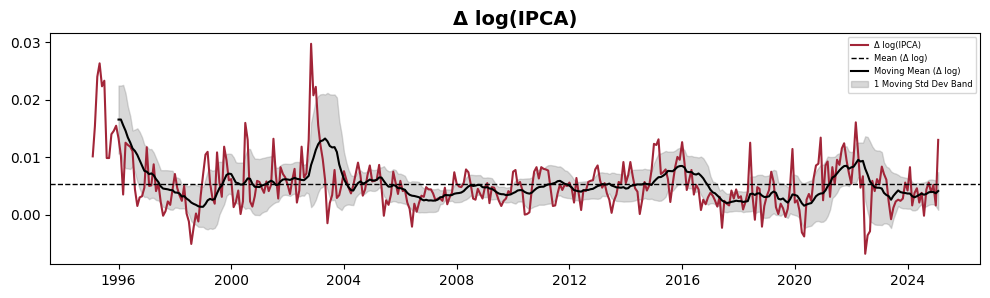

In [9]:
ipca = ipea.timeseries('PRECOS12_IPCA12')

ipca = ipca.rename(columns={
    'RAW DATE': 'date',
    'VALUE (-)': 'IPCA',
    'CODE': 'code',
    'DAY': 'day',
    'MONTH': 'month',
    'YEAR': 'year'
})

################ Plot Growth Rate ################
# ------ Difference of logs over time represents the growth rate ------

column = "IPCA"

# Filter the data from 1995 onwards
ipca = ipca[ipca.index >= '1995-01-01'].copy()

# Apply log transformation to the IPCA column
ipca['Log_IPCA'] = np.log(ipca[column])

# Calculate the first difference of the log
ipca['Log_Diff'] = ipca['Log_IPCA'].diff()

# Define the moving window size
window_size = 12

# Calculate moving average and moving standard deviation of the differenced log series
ipca['Moving_Mean'] = ipca['Log_Diff'].rolling(window=window_size).mean()
ipca['Moving_Std'] = ipca['Log_Diff'].rolling(window=window_size).std()

# Calculate overall mean and standard deviation of the differenced log series
mean_value = ipca['Log_Diff'].mean()
std_dev = ipca['Log_Diff'].std()

# Create the plot
plt.figure(figsize=(12, 3))

# Plot the differenced log series
plt.plot(ipca.index, ipca['Log_Diff'], color=rgb_color, linewidth=1.5, label="Δ log(IPCA)")

# Horizontal line for the overall mean
plt.axhline(mean_value, color='black', linestyle='--', linewidth=1, label='Mean (Δ log)')

# Plot the moving average
plt.plot(ipca.index, ipca['Moving_Mean'], color='black', linewidth=1.5, linestyle='-', label="Moving Mean (Δ log)")

# Plot the moving standard deviation band
plt.fill_between(ipca.index, 
                 ipca['Moving_Mean'] - ipca['Moving_Std'], 
                 ipca['Moving_Mean'] + ipca['Moving_Std'], 
                 color='grey', alpha=0.3, label='1 Moving Std Dev Band')

# Add title and legend
plt.title('Δ log(' + column + ')', fontsize=14, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=14)
plt.legend(fontsize=6)
plt.show()

#### ii. Step 2: 
Using the program of your choice, apply the Box-Jenkins methodology: identification, estimation, and diagnosis.
Ignore the seasonality of inflation for now (or use a SARIMA model).

##### Check whether the series exhibit a trend. If they do, you must use one of two approaches before proceeding:
- Remove it before applying the BJ methodology.  
- Include the trend, if applicable, in the model estimation.


Testing for Stationarity Using the Dickey-Fuller Method

In [10]:
# Options for the regression parameter:
# 'c'   : constant only (default)
# 'ct'  : constant and trend
# 'ctt' : constant, trend, and quadratic trend
# 'nc'  : no constant, no trend

# Analyze GDP
print("=== Analyzing GDP ===")
result = adfuller(gdp['GDP'].dropna(), regression='ct')
adf_stat = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_stat}')
print(f'p-value: {p_value}')
if p_value > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")


# Analyze IPCA
print("=== Analyzing IPCA ===")
result = adfuller(ipca['IPCA'].dropna(), regression='ct')
adf_stat = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_stat}')
print(f'p-value: {p_value}')
if p_value > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")

=== Analyzing GDP ===
ADF Statistic: -1.9354258740739483
p-value: 0.636119964088074
-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.
=== Analyzing IPCA ===
ADF Statistic: 0.808128520692156
p-value: 1.0
-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.


##### Apply the Box-Jenkins methodology: identify, estimate, and verify (conduct diagnostic tests)

Step 1: Identification

In this identification step, we define the AR (p) and MA (q) parameters for each series based on their stationarity and the approach used for trend treatment

In [11]:
# Removing the trend by applying the first difference for GDP
gdp['GDP_diff'] = gdp['GDP'].diff(1)
gdp['GDP_diff'] = gdp['GDP_diff'].dropna()

result_diff = adfuller(gdp['GDP_diff'].dropna())
print("ADF Statistic:", result_diff[0])
p_value_diff = result_diff[1]
print("p-value:", p_value_diff)
if p_value_diff > 0.05:
    print("- The series is NOT stationary (p-value > 0.05). Further differencing or modeling steps may be required.")
else:
    print("- The series is stationary (p-value ≤ 0.05).")


# Removing the trend by applying the first difference for 

ipca['IPCA_diff'] = ipca['IPCA'].diff(1)
ipca['IPCA_diff'] = ipca['IPCA_diff'].dropna()

result_diff = adfuller(ipca['IPCA_diff'].dropna())
print("ADF Statistic:", result_diff[0])
p_value_diff = result_diff[1]
print("p-value:", p_value_diff)
if p_value_diff > 0.05:
    print("- The series is NOT stationary (p-value > 0.05). Further differencing or modeling steps may be required.")
else:
    print("- The series is stationary (p-value ≤ 0.05).")

ADF Statistic: -4.598985722120003
p-value: 0.000129726812964387
- The series is stationary (p-value ≤ 0.05).
ADF Statistic: -3.109616069005091
p-value: 0.025849692508199892
- The series is stationary (p-value ≤ 0.05).


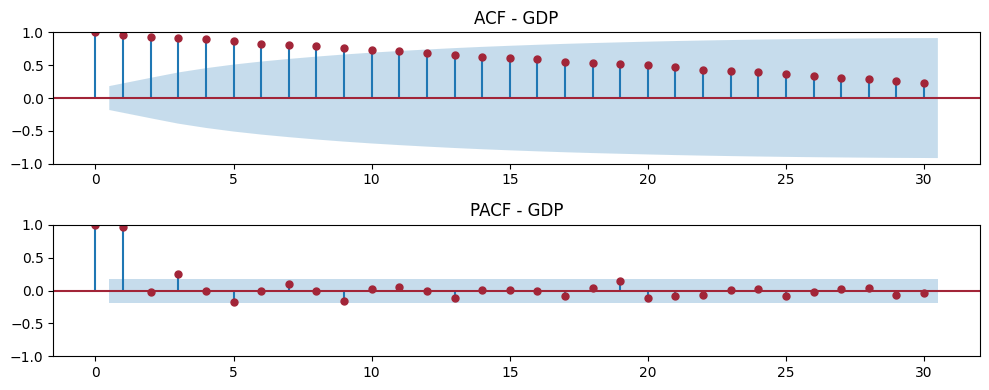

In [12]:
# Autocorrelation Function ( ACF ) and Partial Autocorrelation Function (PACF) for GDP

column = 'GDP'

plt.figure(figsize=(10, 4))

# Plot ACF
ax1 = plt.subplot(211)
plot_acf(gdp[column].dropna(), lags=30, color=rgb_color, ax=ax1, title=f'ACF - {column}')

# Plot PACF
ax2 = plt.subplot(212)
plot_pacf(gdp[column].dropna(), lags=30, color=rgb_color, ax=ax2, title=f'PACF - {column}')

plt.tight_layout()
plt.show()

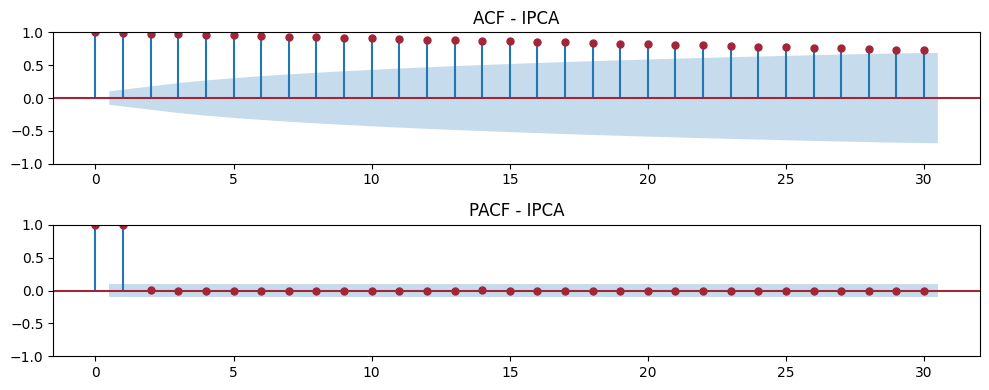

In [13]:
# Autocorrelation Function ( ACF ) and Partial Autocorrelation Function (PACF) for IPCA

column = 'IPCA'

plt.figure(figsize=(10, 4))

# Plot ACF
ax1 = plt.subplot(211)
plot_acf(ipca[column].dropna(), lags=30, color=rgb_color, ax=ax1, title=f'ACF - {column}')

# Plot PACF
ax2 = plt.subplot(212)
plot_pacf(ipca[column].dropna(), lags=30, color=rgb_color, ax=ax2, title=f'PACF - {column}')

plt.tight_layout()
plt.show()

Step 2: Estimation and Step 3:  Diagnostic Checking

In [ ]:
# -----------------------------
# Dectecting the order of ARIMA model using ACF and PACF plots
# -----------------------------
serie_name = 'GDP'
train_perc = 1  # Use 1.0 for full data

# Split data
serie = gdp[serie_name].dropna()
split_index = int(len(serie) * train_perc)
train = serie.iloc[:split_index]
test = serie.iloc[split_index:]

# Candidate params
p_values = [0, 1, 2, 3]
d_values = [0]  # Only d=0 to allow trends
q_values = [0, 1, 2, 3]
trend_types = ['n','c', 't', 'ct']

# Estimate models
results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            for trend_type in trend_types:
                # Skip invalid trend combinations for given d
                if d == 1 and trend_type in ['c', 'ct']:
                    continue
                elif d >= 2 and trend_type != 'n':
                    continue
                try:
                    model = ARIMA(train, order=(p, d, q), trend=trend_type).fit()
                    residuals = model.resid.dropna()
                    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
                    p_value = lb_test['lb_pvalue'].iloc[0]
                    white_noise = p_value > 0.05
                    results.append({
                        'order': (p, d, q),
                        'trend': trend_type,
                        'aic': model.aic,
                        'bic': model.bic,
                        'hqic': model.hqic,
                        'ljung_pvalue': p_value,
                        'white_noise': white_noise,
                        'model': model
                    })
                except Exception as e:
                    print(f"Error fitting ARIMA({p},{d},{q}) with trend='{trend_type}': {e}")



# Print all models
print("\nAll model results sorted by AIC:\n")
for res in sorted(results, key=lambda x: x['aic']):
    status = "✅ White noise" if res['white_noise'] else "⚠️ Autocorr."
    print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
          f"AIC: {round(res['aic'], 2)} | BIC: {round(res['bic'], 2)} | "
          f"HQIC: {round(res['hqic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} → {status}")

# Filter only valid models (white noise)
valid_results = [res for res in results if res['white_noise']]

if not valid_results:
    print("\n⚠️ No model passed the white noise residual test (Ljung-Box p > 0.05 at lag 10).")
else:
    print("\n✅ Models with white noise residuals sorted by AIC:\n")
    for res in sorted(valid_results, key=lambda x: x['aic']):
        print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
              f"AIC: {round(res['aic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} ✅")

    # Best models from valid ones
    best_aic_model = min(valid_results, key=lambda x: x['aic'])
    best_bic_model = min(valid_results, key=lambda x: x['bic'])
    best_hqic_model = min(valid_results, key=lambda x: x['hqic'])

    print("\n--- Best models (with white noise residuals) per criterion ---")
    print(f"Lowest AIC   -> ARIMA{best_aic_model['order']} [trend='{best_aic_model['trend']}']")
    print(f"Lowest BIC   -> ARIMA{best_bic_model['order']} [trend='{best_bic_model['trend']}']")
    print(f"Lowest HQIC  -> ARIMA{best_hqic_model['order']} [trend='{best_hqic_model['trend']}']")

    # Consensus check
    consensus_models = [
        (best_aic_model['order'], best_aic_model['trend']),
        (best_bic_model['order'], best_bic_model['trend']),
        (best_hqic_model['order'], best_hqic_model['trend'])
    ]
    counts = Counter(consensus_models)
    most_common_model, freq = counts.most_common(1)[0]

    if freq > 1:
        print(f"\n🏆 The model ARIMA{most_common_model[0]} [trend='{most_common_model[1]}'] is the best in {freq}/3 criteria.")
        for res in valid_results:
            if res['order'] == most_common_model[0] and res['trend'] == most_common_model[1]:
                print("\n--- Summary of the most common best model ---")
                print(res['model'].summary())

                # Residual plot
                residuals = res['model'].resid.dropna()[1:]
                plt.figure(figsize=(12, 4))
                plt.plot(residuals, color=rgb_color)
                plt.title(f"Residuals - {serie_name} (ARIMA{res['order']} [trend='{res['trend']}'])")
                plt.xlabel("Time")
                plt.ylabel("Residuals")
                plt.tight_layout()
                plt.show()

                # ACF/PACF
                fig, axs = plt.subplots(2, 1, figsize=(12, 6))
                plot_acf(residuals, lags=30, ax=axs[0], color=rgb_color)
                axs[0].set_title("ACF of Residuals")
                plot_pacf(residuals, lags=30, ax=axs[1], color=rgb_color)
                axs[1].set_title("PACF of Residuals")
                plt.tight_layout()
                plt.show()

                # Ljung-Box result
                print(f"\nLjung-Box p-value (lag 10): {res['ljung_pvalue']:.4f}")
                print("✅ Residuals are white noise.")
    else:
        print("\nNo single model dominates in all criteria among valid models.")

In [ ]:
# Forecast and growth calculation for each valid model (assuming splited the data for training)
forecasts = []
steps = len(test)

for res in valid_results:
    try:
        model = ARIMA(train, order=res['order'], trend=res['trend']).fit()
        forecast_ = model.forecast(steps=steps)

        # Last observed value from training data
        last_obs = train.iloc[-1]
        last_forecast = forecast_.iloc[-1]

        growth = (last_forecast / last_obs) - 1

        forecasts.append({
            'order': res['order'],
            'trend': res['trend'],
            'forecast': forecast_,
            'growth': growth
        })

    except Exception as e:
        print(f"Error forecasting with ARIMA{res['order']} [trend='{res['trend']}']: {e}")


print("\n📊 Forecast and Growth Summary (Out-of-Sample):\n")
for item in forecasts:
    print(f"ARIMA{item['order']} [trend='{item['trend']}']:")  
    print(f"→ Forecast (last value): {item['forecast'].iloc[-1]:.2f}")
    print(f"→ Projected growth: {item['growth']:.2%}")
    print("-" * 40)

In [16]:
# Forecast and growth calculation for each valid model (assuming no split the data for training)
forecasts = []

for res in valid_results:
    try:
        # Fit the model on the full series
        model = ARIMA(serie, order=res['order'], trend=res['trend']).fit()

        # Forecast for the next periods
        forecast_ = model.forecast(steps = 4)

        # Last observed value
        last_obs = serie.iloc[-1]

        # Last forecasted value
        last_pred = forecast_.iloc[-1]

        # Calculate growth rate between last observed and final forecasted value
        growth = (last_pred / last_obs) - 1

        # Store results
        forecasts.append({
            'order': res['order'],
            'trend': res['trend'],
            'forecast': forecast_,
            'growth': growth
        })

    except Exception as e:
        print(f"Error forecasting with ARIMA{res['order']} [trend='{res['trend']}']: {e}")

# Print results
print("\n📊 Forecast and Growth Summary (White Noise Models Only):\n")
for item in forecasts:
    print(f"ARIMA{item['order']} [trend='{item['trend']}']:")
    print(item['forecast'].round(2))
    print(f"Projected growth: {item['growth']:.2%}")
    print("-" * 40)



📊 Forecast and Growth Summary (White Noise Models Only):

ARIMA(1, 0, 0) [trend='n']:
2025-01-01    189.44
2025-04-01    189.36
2025-07-01    189.28
2025-10-01    189.20
Freq: QS-OCT, Name: predicted_mean, dtype: float64
Projected growth: -0.17%
----------------------------------------
ARIMA(1, 0, 0) [trend='t']:
2025-01-01    190.33
2025-04-01    191.14
2025-07-01    191.96
2025-10-01    192.77
Freq: QS-OCT, Name: predicted_mean, dtype: float64
Projected growth: 1.72%
----------------------------------------
ARIMA(1, 0, 1) [trend='n']:
2025-01-01    190.41
2025-04-01    190.36
2025-07-01    190.32
2025-10-01    190.27
Freq: QS-OCT, Name: predicted_mean, dtype: float64
Projected growth: 0.40%
----------------------------------------
ARIMA(1, 0, 1) [trend='t']:
2025-01-01    191.98
2025-04-01    192.78
2025-07-01    193.59
2025-10-01    194.39
Freq: QS-OCT, Name: predicted_mean, dtype: float64
Projected growth: 2.57%
----------------------------------------
ARIMA(1, 0, 2) [trend='n']:


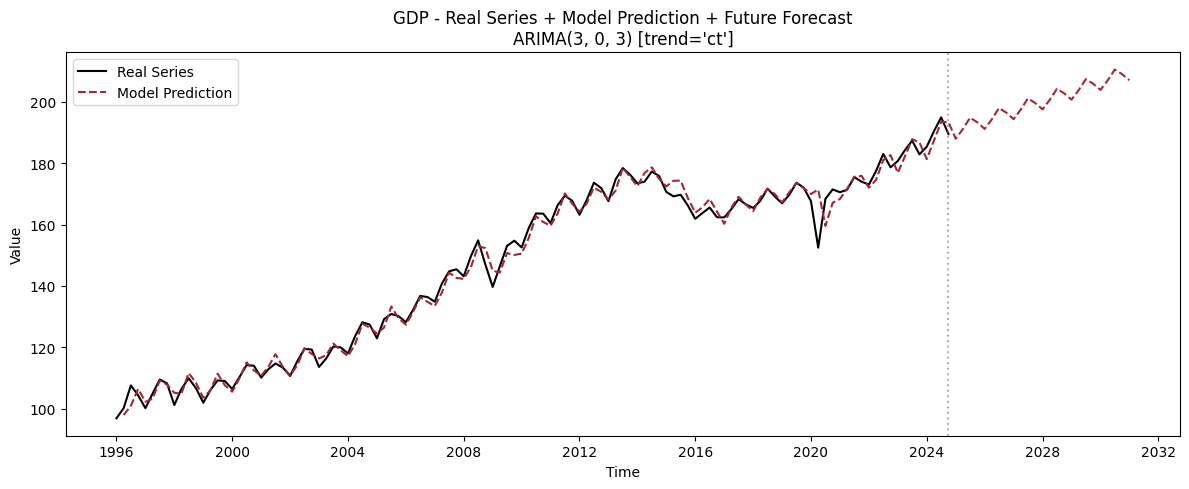


📈 Forecast:
2025-01-01    187.98
2025-04-01    191.12
2025-07-01    194.85
2025-10-01    193.31
2026-01-01    191.17
2026-04-01    194.30
2026-07-01    198.00
2026-10-01    196.47
2027-01-01    194.36
2027-04-01    197.47
2027-07-01    201.14
2027-10-01    199.62
2028-01-01    197.54
2028-04-01    200.63
2028-07-01    204.27
2028-10-01    202.77
2029-01-01    200.71
2029-04-01    203.79
2029-07-01    207.40
2029-10-01    205.91
2030-01-01    203.88
2030-04-01    206.94
2030-07-01    210.52
2030-10-01    209.04
2031-01-01    207.05
Freq: QS-OCT, Name: Out-of-sample Forecast, dtype: float64


In [18]:
# ---------- Manual ARIMA model ----------
serie = gdp["GDP"].astype(float).dropna()

model_gdp = ARIMA(serie, order=(3, 0, 3), trend='ct')
fit_ipca = model_gdp.fit()

res = {
    'model': fit_ipca,
    'order': (3, 0, 3),
    'trend': 'ct'
}

serie = serie


# ---------- PART 1: In-sample prediction (train + test) ----------
in_sample_pred = res['model'].predict(start=serie.index[1], end=serie.index[-1])  # starts at second point
in_sample_pred.name = 'In-sample Prediction'

# ---------- PART 2: Forecast for the next 4 periods ----------
future_steps = 25
last_date = serie.index[-1]
freq = pd.infer_freq(serie.index) or 'Q'
offset = pd.tseries.frequencies.to_offset(freq)

future_index = pd.date_range(start=last_date + offset, periods=future_steps, freq=freq)
future_forecast = res['model'].forecast(steps=future_steps)
future_forecast.index = future_index
future_forecast.name = 'Out-of-sample Forecast'

# ---------- PART 3: Full prediction (entire series + 4 future periods) ----------
full_prediction = pd.concat([in_sample_pred, future_forecast])
full_series = pd.concat([serie, future_forecast])  # real series + future forecast

# ---------- PART 4: Unified plot ----------
plt.figure(figsize=(12, 5))

# Real series (black)
plt.plot(serie.index, serie.values, color='black', label='Real Series')

# Model prediction (in-sample + future), dashed
plt.plot(full_prediction.index, full_prediction.values, color=rgb_color, linestyle='--', label='Model Prediction')

# Vertical line marking the start of the future forecast
plt.axvline(x=serie.index[-1], color='gray', linestyle=':', alpha=0.6)

plt.title(f"{serie_name} - Real Series + Model Prediction + Future Forecast\nARIMA{res['order']} [trend='{res['trend']}']")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- Out-of-sample forecast values ----------
print("\n📈 Forecast:")
print(future_forecast.round(2))

===========================================================================================

In [19]:
# -----------------------------
# Dectecting the order of ARIMA model using ACF and PACF plots
# -----------------------------
serie_name = 'IPCA'
train_perc = 1  # Use 1.0 for full data

# Split data
serie = ipca[serie_name].dropna()
split_index = int(len(serie) * train_perc)
train = serie.iloc[:split_index]
test = serie.iloc[split_index:]

# Candidate params
p_values = [ 1, 2, 3, 4]
d_values = [0, 1]
q_values = [ 1, 2, 5]
trend_types = ['c', 't', 'ct']

# Estimate models
results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            for trend_type in trend_types:
                # Skip invalid trend combinations for given d
                if d == 1 and trend_type in ['c', 'ct']:
                    continue
                elif d >= 2 and trend_type != 'n':
                    continue
                try:
                    model = ARIMA(train, order=(p, d, q), trend=trend_type).fit()
                    residuals = model.resid.dropna()
                    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
                    p_value = lb_test['lb_pvalue'].iloc[0]
                    white_noise = p_value > 0.05
                    results.append({
                        'order': (p, d, q),
                        'trend': trend_type,
                        'aic': model.aic,
                        'bic': model.bic,
                        'hqic': model.hqic,
                        'ljung_pvalue': p_value,
                        'white_noise': white_noise,
                        'model': model
                    })
                except Exception as e:
                    print(f"Error fitting ARIMA({p},{d},{q}) with trend='{trend_type}': {e}")



# Print all models
print("\nAll model results sorted by AIC:\n")
for res in sorted(results, key=lambda x: x['aic']):
    status = "✅ White noise" if res['white_noise'] else "⚠️ Autocorr."
    print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
          f"AIC: {round(res['aic'], 2)} | BIC: {round(res['bic'], 2)} | "
          f"HQIC: {round(res['hqic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} → {status}")

# Filter only valid models (white noise)
valid_results = [res for res in results if res['white_noise']]

if not valid_results:
    print("\n⚠️ No model passed the white noise residual test (Ljung-Box p > 0.05 at lag 10).")
else:
    print("\n✅ Models with white noise residuals sorted by AIC:\n")
    for res in sorted(valid_results, key=lambda x: x['aic']):
        print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
              f"AIC: {round(res['aic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} ✅")

    # Best models from valid ones
    best_aic_model = min(valid_results, key=lambda x: x['aic'])
    best_bic_model = min(valid_results, key=lambda x: x['bic'])
    best_hqic_model = min(valid_results, key=lambda x: x['hqic'])

    print("\n--- Best models (with white noise residuals) per criterion ---")
    print(f"Lowest AIC   -> ARIMA{best_aic_model['order']} [trend='{best_aic_model['trend']}']")
    print(f"Lowest BIC   -> ARIMA{best_bic_model['order']} [trend='{best_bic_model['trend']}']")
    print(f"Lowest HQIC  -> ARIMA{best_hqic_model['order']} [trend='{best_hqic_model['trend']}']")

    # Consensus check
    consensus_models = [
        (best_aic_model['order'], best_aic_model['trend']),
        (best_bic_model['order'], best_bic_model['trend']),
        (best_hqic_model['order'], best_hqic_model['trend'])
    ]
    counts = Counter(consensus_models)
    most_common_model, freq = counts.most_common(1)[0]

    if freq > 1:
        print(f"\n🏆 The model ARIMA{most_common_model[0]} [trend='{most_common_model[1]}'] is the best in {freq}/3 criteria.")
        for res in valid_results:
            if res['order'] == most_common_model[0] and res['trend'] == most_common_model[1]:
                print("\n--- Summary of the most common best model ---")
                print(res['model'].summary())

                # Residual plot
                residuals = res['model'].resid.dropna()[1:]
                plt.figure(figsize=(12, 4))
                plt.plot(residuals, color=rgb_color)
                plt.title(f"Residuals - {serie_name} (ARIMA{res['order']} [trend='{res['trend']}'])")
                plt.xlabel("Time")
                plt.ylabel("Residuals")
                plt.tight_layout()
                plt.show()

                # ACF/PACF
                fig, axs = plt.subplots(2, 1, figsize=(12, 6))
                plot_acf(residuals, lags=30, ax=axs[0], color=rgb_color)
                axs[0].set_title("ACF of Residuals")
                plot_pacf(residuals, lags=30, ax=axs[1], color=rgb_color)
                axs[1].set_title("PACF of Residuals")
                plt.tight_layout()
                plt.show()

                # Ljung-Box result
                print(f"\nLjung-Box p-value (lag 10): {res['ljung_pvalue']:.4f}")
                print("✅ Residuals are white noise.")
    else:
        print("\nNo single model dominates in all criteria among valid models.")


All model results sorted by AIC:

ARIMA(4, 1, 5) [trend='t'] - AIC: 2866.98 | BIC: 2909.76 | HQIC: 2883.99 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(4, 1, 2) [trend='t'] - AIC: 2867.63 | BIC: 2898.74 | HQIC: 2880.0 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(3, 1, 2) [trend='t'] - AIC: 2868.86 | BIC: 2896.08 | HQIC: 2879.68 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(1, 1, 1) [trend='t'] - AIC: 2876.99 | BIC: 2892.54 | HQIC: 2883.17 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(1, 1, 5) [trend='t'] - AIC: 2877.37 | BIC: 2908.49 | HQIC: 2889.74 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(1, 1, 2) [trend='t'] - AIC: 2878.54 | BIC: 2897.98 | HQIC: 2886.27 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(2, 1, 1) [trend='t'] - AIC: 2878.66 | BIC: 2898.1 | HQIC: 2886.39 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(2, 1, 5) [trend='t'] - AIC: 2878.7 | BIC: 2913.7 | HQIC: 2892.62 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(2, 1, 2) [trend='t'] - AIC: 2880.5 | BIC: 2903.84 | HQIC: 2889.78 | Ljung-B

In [ ]:
# Forecast and growth calculation for each valid model (assuming splited the data for training)
forecasts = []
steps = len(test)

for res in valid_results:
    try:
        model = ARIMA(train, order=res['order'], trend=res['trend']).fit()
        forecast_ = model.forecast(steps=steps)

        # Last observed value from training data
        last_obs = train.iloc[-1]
        last_forecast = forecast_.iloc[-1]

        growth = (last_forecast / last_obs) - 1

        forecasts.append({
            'order': res['order'],
            'trend': res['trend'],
            'forecast': forecast_,
            'growth': growth
        })

    except Exception as e:
        print(f"Error forecasting with ARIMA{res['order']} [trend='{res['trend']}']: {e}")


print("\n📊 Forecast and Growth Summary (Out-of-Sample):\n")
for item in forecasts:
    print(f"ARIMA{item['order']} [trend='{item['trend']}']:")  
    print(f"→ Forecast (last value): {item['forecast'].iloc[-1]:.2f}")
    print(f"→ Projected growth: {item['growth']:.2%}")
    print("-" * 40)

In [27]:
# Forecast and growth calculation for each valid model (assuming no split the data for training)
forecasts = []

for res in valid_results:
    try:
        # Fit the model on the full series
        model = ARIMA(serie, order=res['order'], trend=res['trend']).fit()

        # Forecast for the next periods
        forecast_ = model.forecast(steps = 10 )

        # december 2024
        last_obs = serie.iloc[-3]

        # Last forecasted value
        last_pred = forecast_.iloc[-1]

        # Calculate growth rate between last observed and final forecasted value
        growth = (last_pred / last_obs) - 1

        # Store results
        forecasts.append({
            'order': res['order'],
            'trend': res['trend'],
            'forecast': forecast_,
            'growth': growth
        })

    except Exception as e:
        print(f"Error forecasting with ARIMA{res['order']} [trend='{res['trend']}']: {e}")

# Print results
print("\n📊 Forecast and Growth Summary (White Noise Models Only):\n")
for item in forecasts:
    print(f"ARIMA{item['order']} [trend='{item['trend']}']:")
    print(item['forecast'].round(2))
    print(f"Projected growth: {item['growth']:.2%}")
    print("-" * 40)


📊 Forecast and Growth Summary (White Noise Models Only):

ARIMA(1, 0, 1) [trend='c']:
2025-03-01    7265.43
2025-04-01    7265.27
2025-05-01    7265.10
2025-06-01    7264.94
2025-07-01    7264.78
2025-08-01    7264.62
2025-09-01    7264.46
2025-10-01    7264.30
2025-11-01    7264.14
2025-12-01    7263.98
Freq: MS, Name: predicted_mean, dtype: float64
Projected growth: 2.30%
----------------------------------------
ARIMA(1, 0, 1) [trend='t']:
2025-03-01    7262.33
2025-04-01    7279.53
2025-05-01    7296.74
2025-06-01    7313.94
2025-07-01    7331.14
2025-08-01    7348.34
2025-09-01    7365.55
2025-10-01    7382.75
2025-11-01    7399.95
2025-12-01    7417.15
Freq: MS, Name: predicted_mean, dtype: float64
Projected growth: 4.46%
----------------------------------------
ARIMA(1, 0, 1) [trend='ct']:
2025-03-01    7262.29
2025-04-01    7279.42
2025-05-01    7296.54
2025-06-01    7313.66
2025-07-01    7330.79
2025-08-01    7347.91
2025-09-01    7365.04
2025-10-01    7382.16
2025-11-01    73

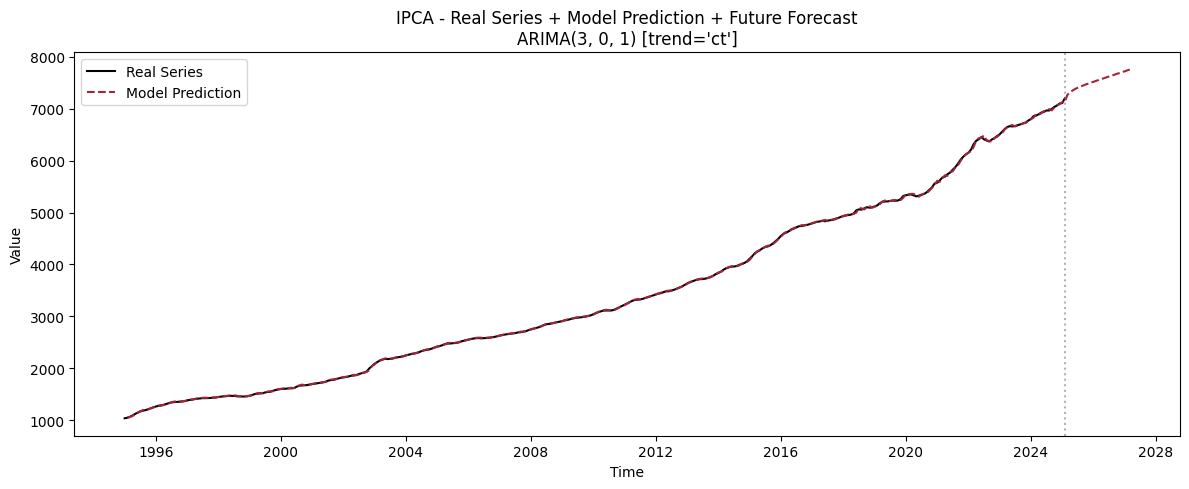


📈 Forecast:
2025-03-01    7267.07
2025-04-01    7316.84
2025-05-01    7351.00
2025-06-01    7382.79
2025-07-01    7405.42
2025-08-01    7429.74
2025-09-01    7447.62
2025-10-01    7468.84
2025-11-01    7484.76
2025-12-01    7504.69
2026-01-01    7519.83
2026-02-01    7539.20
2026-03-01    7554.03
2026-04-01    7573.17
2026-05-01    7587.89
2026-06-01    7606.92
2026-07-01    7621.61
2026-08-01    7640.58
2026-09-01    7655.28
2026-10-01    7674.22
2026-11-01    7688.94
2026-12-01    7707.85
2027-01-01    7722.59
2027-02-01    7741.49
2027-03-01    7756.26
Freq: MS, Name: Out-of-sample Forecast, dtype: float64


In [28]:

# ---------- Manual ARIMA model ----------
serie_ipca = ipca["IPCA"].astype(float).dropna()

model_ipca = ARIMA(serie_ipca, order=(3, 0, 1), trend='ct')
fit_ipca = model_ipca.fit()

res = {
    'model': fit_ipca,
    'order': (3, 0, 1),
    'trend': 'ct'
}

serie = serie_ipca 


# ---------- PART 1: In-sample prediction (train + test) ----------
in_sample_pred = res['model'].predict(start=serie.index[1], end=serie.index[-1])  # starts at second point
in_sample_pred.name = 'In-sample Prediction'

# ---------- PART 2: Forecast for the next periods ----------
future_steps = 25
last_date = serie.index[-1]
freq = pd.infer_freq(serie.index) or 'Q'
offset = pd.tseries.frequencies.to_offset(freq)

future_index = pd.date_range(start=last_date + offset, periods=future_steps, freq=freq)
future_forecast = res['model'].forecast(steps=future_steps)
future_forecast.index = future_index
future_forecast.name = 'Out-of-sample Forecast'

# ---------- PART 3: Full prediction (entire series + future periods) ----------
full_prediction = pd.concat([in_sample_pred, future_forecast])
full_series = pd.concat([serie, future_forecast])  # real series + future forecast

# ---------- PART 4: Unified plot ----------
plt.figure(figsize=(12, 5))

# Real series (black)
plt.plot(serie.index, serie.values, color='black', label='Real Series')

# Model prediction (in-sample + future), dashed
plt.plot(full_prediction.index, full_prediction.values, color=rgb_color, linestyle='--', label='Model Prediction')

# Vertical line marking the start of the future forecast
plt.axvline(x=serie.index[-1], color='gray', linestyle=':', alpha=0.6)

plt.title(f"{serie_name} - Real Series + Model Prediction + Future Forecast\nARIMA{res['order']} [trend='{res['trend']}']")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- Out-of-sample forecast values ----------
print("\n📈 Forecast:")
print(future_forecast.round(2))



#### Step 3: Make a forecast for GDP (quarterly) and inflation (monthly) until the end of 2025. Based on these forecasts, calculate:

- The GDP growth forecast for 2025. Let PIB<sup>P</sup><sub>2025</sub> be the value projected by the model for the fourth quarter of 2025, and PIB<sup>m</sup><sub>2024</sub>  be the actual value for the fourth quarter of 2024.

In [29]:
# Here we estimate the model

serie_pib = gdp["GDP"].astype(float).dropna()
serie_pib = serie_pib.sort_index()

model_full = ARIMA(serie_pib, order=(3,0,3), trend='ct')
fit_full = model_full.fit()

# Forecast the 4 quarters of 2025
forecast_2025 = fit_full.forecast( steps = 4)

# Last observed value (2024Q4)
gdp_2024_Q4 = serie_pib.iloc[-1]

# Forecasted value for 2025Q4
gdp_2025_Q4 = forecast_2025.iloc[-1]

# Calculate GDP growth for 2025
delta_gdp = (gdp_2025_Q4 / gdp_2024_Q4) - 1

# ------------------ Final result

print("\n--- Final Result ---")
print(f"Observed GDP (2024Q4): {gdp_2024_Q4:.2f}")
print(f"Forecasted GDP (2025Q4): {gdp_2025_Q4:.2f}")
print(f"GDP growth in 2025: {delta_gdp:.2%}")


--- Final Result ---
Observed GDP (2024Q4): 189.51
Forecasted GDP (2025Q4): 193.31
GDP growth in 2025: 2.00%


- The IPCA growth forecast for 2025. Let IPCA<sup>P</sup><sub>2025</sub> be the value projected by the model for the december 2025, and IPCA<sub>2024</sub>  be the actual value for december 2024

In [31]:
# Here we estimate the model

serie_ipca = ipca["IPCA"].astype(float).dropna()

model_ipca = ARIMA(serie_ipca, order= (3,0,1), trend='ct')
fit_ipca = model_ipca.fit()

# Forecast 12 months ahead (for all of 2025)
forecast_ipca = fit_ipca.forecast(steps = 10)

# Last observed value (Dec 2024)
ipca_2024_Dec = serie_ipca.iloc[-3]

# Forecasted value for Dec 2025
ipca_2025_Dec = forecast_ipca.iloc[-1]

# Calculate inflation for 2025
delta_ipca = (ipca_2025_Dec / ipca_2024_Dec) - 1

# ------------------ Final result

print("\n--- Final Result ---")
print(f"Observed IPCA (Dec 2024): {ipca_2024_Dec:.2f}")
print(f"Forecasted IPCA (Dec 2025): {ipca_2025_Dec:.2f}")
print(f"Inflation in 2025: {delta_ipca:.2%}")


--- Final Result ---
Observed IPCA (Dec 2024): 7100.50
Forecasted IPCA (Dec 2025): 7504.69
Inflation in 2025: 5.69%


- Repeat the previous steps for 2025 and 2027. In this case, you will need to use the forecasted values.

How do your forecasts compare to the Central Bank's FOCUS Bulletin projections for GDP and inflation (12-month accumulated variation for December) for 2025, 2026, and 2027?

In [32]:
# Here we estimate the model

serie_pib = gdp["GDP"].astype(float).dropna()
serie_pib = serie_pib.sort_index()

# Estimate the model using all available data
model_full = ARIMA(serie_pib, order=(3,0,3), trend='ct')
fit_full = model_full.fit()

# Forecast 12 quarters ahead (2025 to 2027)
forecast = fit_full.forecast(steps=12)

# Last observed value (2024Q4)
gdp_2024_Q4 = serie_pib.iloc[-1]

# Forecasted values for Q4 of each year
gdp_2025_Q4 = forecast.iloc[3]   # 4th forecasted quarter
gdp_2026_Q4 = forecast.iloc[7]   # 8th forecasted quarter
gdp_2027_Q4 = forecast.iloc[11]  # 12th forecasted quarter

# Calculate GDP growth for each year
growth_2025 = (gdp_2025_Q4 / gdp_2024_Q4) - 1
growth_2026 = (gdp_2026_Q4 / gdp_2025_Q4) - 1
growth_2027 = (gdp_2027_Q4 / gdp_2026_Q4) - 1

# ------------------ Final Results

print("\n--- Final Results ---")
print(f"Observed GDP (2024Q4): {gdp_2024_Q4:.2f}")
print(f"Forecasted GDP (2025Q4): {gdp_2025_Q4:.2f}")
print(f"Forecasted GDP (2026Q4): {gdp_2026_Q4:.2f}")
print(f"Forecasted GDP (2027Q4): {gdp_2027_Q4:.2f}")

print(f"\nGDP growth in 2025: {growth_2025:.2%}")
print(f"GDP growth in 2026: {growth_2026:.2%}")
print(f"GDP growth in 2027: {growth_2027:.2%}")


--- Final Results ---
Observed GDP (2024Q4): 189.51
Forecasted GDP (2025Q4): 193.31
Forecasted GDP (2026Q4): 196.47
Forecasted GDP (2027Q4): 199.62

GDP growth in 2025: 2.00%
GDP growth in 2026: 1.63%
GDP growth in 2027: 1.60%


In [34]:
# Estimate the model using all available data
serie_ipca = ipca["IPCA"].astype(float).dropna().sort_index()
model_ipca = ARIMA(serie_ipca, order=(3, 0, 1), trend='ct')
fit_ipca = model_ipca.fit()

# Forecast 36 months ahead (from March 2025 onward)
forecast_steps = 36
forecast_ipca = fit_ipca.forecast(steps=forecast_steps)

# Last observed value (Feb 2025)
ipca_feb_2025 = serie_ipca.iloc[-3]

# Get forecasted values for Dec/2025, Dec/2026, Dec/2027
ipca_dec_2025 = forecast_ipca.iloc[9]   # 10th forecasted month = Dec 2025
ipca_dec_2026 = forecast_ipca.iloc[20]  # 21st forecasted month = Dec 2026
ipca_dec_2027 = forecast_ipca.iloc[31]  # 32nd forecasted month = Dec 2027

# Calculate inflation between years
inflation_2025 = (ipca_dec_2025 / ipca_feb_2025) - 1
inflation_2026 = (ipca_dec_2026 / ipca_dec_2025) - 1
inflation_2027 = (ipca_dec_2027 / ipca_dec_2026) - 1

# ------------------ Final Results
print("\n--- Final Results ---")
print(f"Observed IPCA (Feb 2025): {ipca_feb_2025:.2f}")
print(f"Forecasted IPCA (Dec 2025): {ipca_dec_2025:.2f}")
print(f"Forecasted IPCA (Dec 2026): {ipca_dec_2026:.2f}")
print(f"Forecasted IPCA (Dec 2027): {ipca_dec_2027:.2f}")

print(f"\nInflation from Feb to Dec 2025: {inflation_2025:.2%}")
print(f"Inflation in 2026: {inflation_2026:.2%}")
print(f"Inflation in 2027: {inflation_2027:.2%}")



--- Final Results ---
Observed IPCA (Feb 2025): 7100.50
Forecasted IPCA (Dec 2025): 7504.69
Forecasted IPCA (Dec 2026): 7688.94
Forecasted IPCA (Dec 2027): 7876.14

Inflation from Feb to Dec 2025: 5.69%
Inflation in 2026: 2.46%
Inflation in 2027: 2.43%


 📊 Comparison of Inflation Forecasts (%)

| Year | My Forecast | FOCUS Forecast | Difference (pp) |
|------|---------------|----------------|-----------------|
| 2025 | 5.69%         | 5.65%          | +0.04           |
| 2026 | 2.46%         | 4.50%          | -2.04           |
| 2027 | 2.43%         | 4.00%          | -1.57           |

**Note:** This gap may reflect the model's strong reliance on recent trends, while the FOCUS forecast includes market expectations and anticipated policy impacts.


📊 Comparison of GDP Growth Forecasts (%)

| Year | My Forecast | FOCUS Forecast | Difference (pp) |
|------|---------------|----------------|-----------------|
| 2025 | 2.0%         | 1.98%          | +0.02           |
| 2026 | 1.63%         | 1.60%          | +0.03           |
| 2027 | 1.60%         | 1.99%          | -0.39           |

**Note:** Differences are small, suggesting your model captures the general trend, though it slightly underestimates growth in 2025 and 2027.



🦠 How to Handle COVID-19?

Different approaches have been proposed. **Schorfheide and Song (2021)**, for example, argue for removing the observations and not modifying the model to account for extreme values.

Here, I suggest two alternatives:

1. **Include a level dummy** for the most critical months.
2. **Replace the most intense COVID-19 periods**, \( Y^{COVID}_t \), with the simple average of *X* preceding and following months/quarters, and redo item ii of Question 2.



All model results sorted by AIC:

ARIMA(4, 0, 5) [trend='ct'] - AIC: 517.65 | BIC: 550.69 | HQIC: 531.06 | Ljung-Box p: 0.9417 → ✅ White noise
ARIMA(3, 0, 2) [trend='ct'] - AIC: 521.1 | BIC: 543.13 | HQIC: 530.04 | Ljung-Box p: 0.1358 → ✅ White noise
ARIMA(3, 0, 5) [trend='ct'] - AIC: 522.01 | BIC: 552.3 | HQIC: 534.3 | Ljung-Box p: 0.3775 → ✅ White noise
ARIMA(3, 0, 2) [trend='t'] - AIC: 523.89 | BIC: 543.16 | HQIC: 531.71 | Ljung-Box p: 0.9999 → ✅ White noise
ARIMA(4, 0, 2) [trend='ct'] - AIC: 526.08 | BIC: 550.86 | HQIC: 536.14 | Ljung-Box p: 0.2380 → ✅ White noise
ARIMA(3, 0, 5) [trend='t'] - AIC: 528.73 | BIC: 556.27 | HQIC: 539.91 | Ljung-Box p: 0.9999 → ✅ White noise
ARIMA(4, 0, 5) [trend='t'] - AIC: 529.41 | BIC: 559.7 | HQIC: 541.71 | Ljung-Box p: 0.9999 → ✅ White noise
ARIMA(4, 0, 5) [trend='c'] - AIC: 529.88 | BIC: 560.17 | HQIC: 542.18 | Ljung-Box p: 0.9710 → ✅ White noise
ARIMA(3, 0, 2) [trend='c'] - AIC: 538.46 | BIC: 557.73 | HQIC: 546.28 | Ljung-Box p: 0.9645 → ✅ White

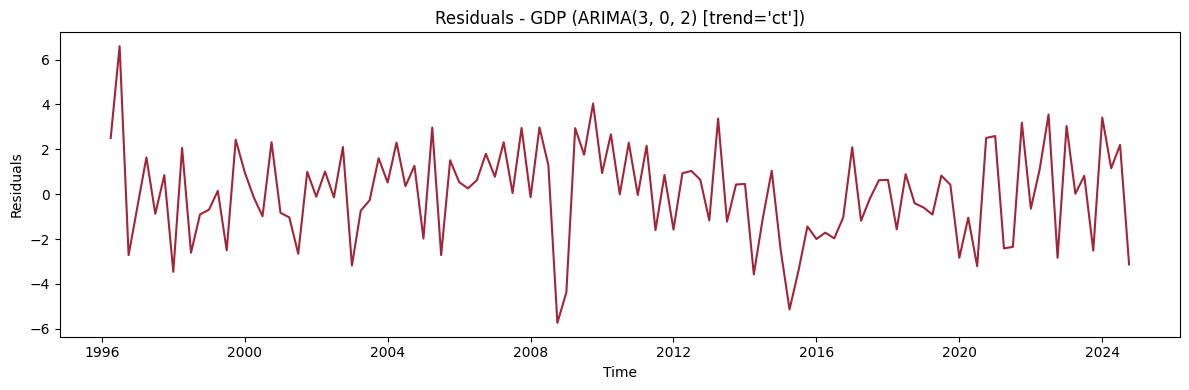

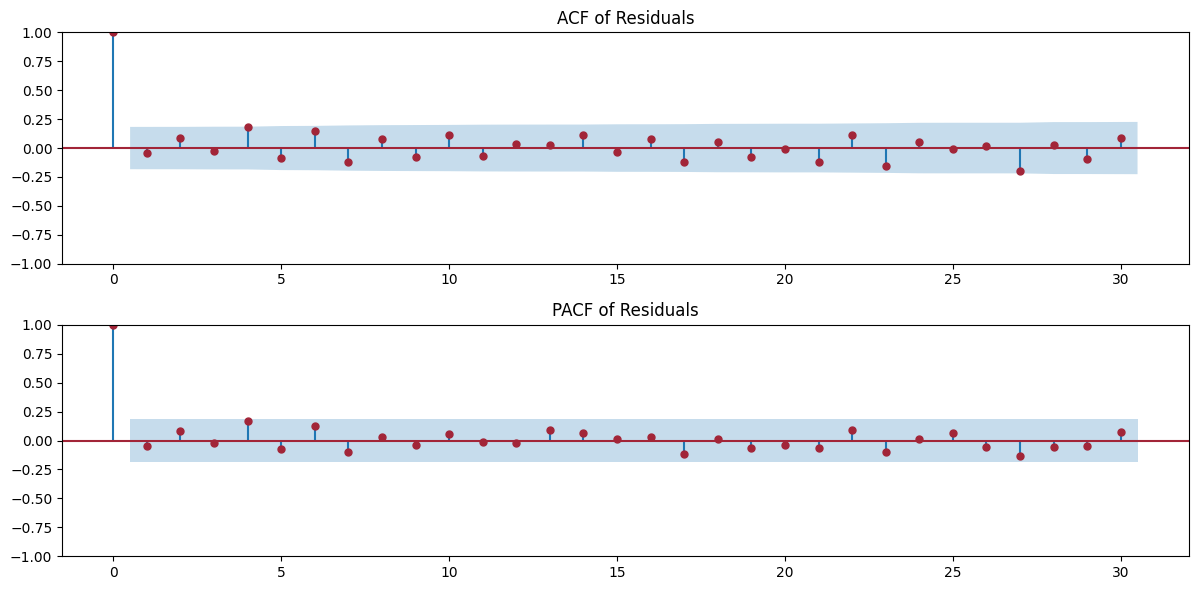


Ljung-Box p-value (lag 10): 0.1358
✅ Residuals are white noise.


In [35]:
# ----- SERIES PREPARATION -----

serie_name = 'GDP'
train_perc = 1  # ajuste se quiser fazer split depois

serie = gdp[serie_name].dropna().copy()
serie.index = pd.to_datetime(serie.index, utc=True).tz_localize(None)
serie_corrected = serie.copy()

# ----- DEFINE CRITICAL PERIODS TO INTERPOLATE -----

critical_periods = pd.to_datetime([
    "2020-04-01 00:00:00",
    "2020-07-01 00:00:00",
    "2020-10-01 00:00:00",
    "2021-01-01 00:00:00",
    "2021-04-01 00:00:00",
    "2021-07-01 00:00:00",
    "2021-10-01 00:00:00",
])

X = 2  # Number of periods before and after to use in smoothing

# ----- SEQUENTIAL SMOOTHING OF CRITICAL PERIODS -----

for period in sorted(critical_periods):
    if period in serie_corrected.index:
        pos = serie_corrected.index.get_loc(period)
        if pos - X >= 0 and pos + X < len(serie_corrected):
            avg_before = serie_corrected.iloc[pos - X:pos].mean()
            avg_after = serie_corrected.iloc[pos + 1:pos + X + 1].mean()
            corrected_value = (avg_before + avg_after) / 2
            # Atualiza usando .loc para garantir que o valor seja substituído corretamente
            serie_corrected.loc[period] = corrected_value

# -----------------------------
# Dectecting the order of ARIMA model using ACF and PACF plots
# -----------------------------

# Split data
split_index = int(len(serie_corrected) * train_perc)
train = serie_corrected.iloc[:split_index]
test = serie_corrected.iloc[split_index:]

# Candidate params
p_values = [ 1, 2, 3, 4]
d_values = [0]
q_values = [ 1, 2, 5]
trend_types = ['c', 't', 'ct']

# Estimate models
results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            for trend_type in trend_types:
                # Skip invalid trend combinations for given d
                if d == 1 and trend_type in ['c', 'ct']:
                    continue
                elif d >= 2 and trend_type != 'n':
                    continue
                try:
                    model = ARIMA(train, order=(p, d, q), trend=trend_type).fit()
                    residuals = model.resid.dropna()
                    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
                    p_value = lb_test['lb_pvalue'].iloc[0]
                    white_noise = p_value > 0.05
                    results.append({
                        'order': (p, d, q),
                        'trend': trend_type,
                        'aic': model.aic,
                        'bic': model.bic,
                        'hqic': model.hqic,
                        'ljung_pvalue': p_value,
                        'white_noise': white_noise,
                        'model': model
                    })
                except Exception as e:
                    print(f"Error fitting ARIMA({p},{d},{q}) with trend='{trend_type}': {e}")



# Print all models
print("\nAll model results sorted by AIC:\n")
for res in sorted(results, key=lambda x: x['aic']):
    status = "✅ White noise" if res['white_noise'] else "⚠️ Autocorr."
    print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
          f"AIC: {round(res['aic'], 2)} | BIC: {round(res['bic'], 2)} | "
          f"HQIC: {round(res['hqic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} → {status}")

# Filter only valid models (white noise)
valid_results = [res for res in results if res['white_noise']]

if not valid_results:
    print("\n⚠️ No model passed the white noise residual test (Ljung-Box p > 0.05 at lag 10).")
else:
    print("\n✅ Models with white noise residuals sorted by AIC:\n")
    for res in sorted(valid_results, key=lambda x: x['aic']):
        print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
              f"AIC: {round(res['aic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} ✅")

    # Best models from valid ones
    best_aic_model = min(valid_results, key=lambda x: x['aic'])
    best_bic_model = min(valid_results, key=lambda x: x['bic'])
    best_hqic_model = min(valid_results, key=lambda x: x['hqic'])

    print("\n--- Best models (with white noise residuals) per criterion ---")
    print(f"Lowest AIC   -> ARIMA{best_aic_model['order']} [trend='{best_aic_model['trend']}']")
    print(f"Lowest BIC   -> ARIMA{best_bic_model['order']} [trend='{best_bic_model['trend']}']")
    print(f"Lowest HQIC  -> ARIMA{best_hqic_model['order']} [trend='{best_hqic_model['trend']}']")

    # Consensus check
    consensus_models = [
        (best_aic_model['order'], best_aic_model['trend']),
        (best_bic_model['order'], best_bic_model['trend']),
        (best_hqic_model['order'], best_hqic_model['trend'])
    ]
    counts = Counter(consensus_models)
    most_common_model, freq = counts.most_common(1)[0]

    if freq > 1:
        print(f"\n🏆 The model ARIMA{most_common_model[0]} [trend='{most_common_model[1]}'] is the best in {freq}/3 criteria.")
        for res in valid_results:
            if res['order'] == most_common_model[0] and res['trend'] == most_common_model[1]:
                print("\n--- Summary of the most common best model ---")
                print(res['model'].summary())

                # Residual plot
                residuals = res['model'].resid.dropna()[1:]
                plt.figure(figsize=(12, 4))
                plt.plot(residuals, color=rgb_color)
                plt.title(f"Residuals - {serie_name} (ARIMA{res['order']} [trend='{res['trend']}'])")
                plt.xlabel("Time")
                plt.ylabel("Residuals")
                plt.tight_layout()
                plt.show()

                # ACF/PACF
                fig, axs = plt.subplots(2, 1, figsize=(12, 6))
                plot_acf(residuals, lags=30, ax=axs[0], color=rgb_color)
                axs[0].set_title("ACF of Residuals")
                plot_pacf(residuals, lags=30, ax=axs[1], color=rgb_color)
                axs[1].set_title("PACF of Residuals")
                plt.tight_layout()
                plt.show()

                # Ljung-Box result
                print(f"\nLjung-Box p-value (lag 10): {res['ljung_pvalue']:.4f}")
                print("✅ Residuals are white noise.")
    else:
        print("\nNo single model dominates in all criteria among valid models.")

In [ ]:
# Forecast and growth calculation for each valid model (assuming splited the data for training)
forecasts = []
steps = len(test)

for res in valid_results:
    try:
        model = ARIMA(train, order=res['order'], trend=res['trend']).fit()
        forecast_ = model.forecast(steps=steps)

        # Last observed value from training data
        last_obs = train.iloc[-1]
        last_forecast = forecast_.iloc[-1]

        growth = (last_forecast / last_obs) - 1

        forecasts.append({
            'order': res['order'],
            'trend': res['trend'],
            'forecast': forecast_,
            'growth': growth
        })

    except Exception as e:
        print(f"Error forecasting with ARIMA{res['order']} [trend='{res['trend']}']: {e}")


print("\n📊 Forecast and Growth Summary (Out-of-Sample):\n")
for item in forecasts:
    print(f"ARIMA{item['order']} [trend='{item['trend']}']:")  
    print(f"→ Forecast (last value): {item['forecast'].iloc[-1]:.2f}")
    print(f"→ Projected growth: {item['growth']:.2%}")
    print("-" * 40)

In [37]:
# Forecast and growth calculation for each valid model (assuming no split the data for training)
forecasts = []

for res in valid_results:
    try:
        # Fit the model on the full series
        model = ARIMA(serie, order=res['order'], trend=res['trend']).fit()

        # Forecast for the next periods
        forecast_ = model.forecast(steps = 10 )

        # Last observed value
        last_obs = serie.iloc[-1]

        # Last forecasted value
        last_pred = forecast_.iloc[-1]

        # Calculate growth rate between last observed and final forecasted value
        growth = (last_pred / last_obs) - 1

        # Store results
        forecasts.append({
            'order': res['order'],
            'trend': res['trend'],
            'forecast': forecast_,
            'growth': growth
        })

    except Exception as e:
        print(f"Error forecasting with ARIMA{res['order']} [trend='{res['trend']}']: {e}")

# Print results
print("\n📊 Forecast and Growth Summary (White Noise Models Only):\n")
for item in forecasts:
    print(f"ARIMA{item['order']} [trend='{item['trend']}']:")
    print(item['forecast'].round(2))
    print(f"Projected growth: {item['growth']:.2%}")
    print("-" * 40)


📊 Forecast and Growth Summary (White Noise Models Only):

ARIMA(1, 0, 1) [trend='t']:
2025-01-01    191.98
2025-04-01    192.78
2025-07-01    193.59
2025-10-01    194.39
2026-01-01    195.20
2026-04-01    196.00
2026-07-01    196.81
2026-10-01    197.61
2027-01-01    198.42
2027-04-01    199.22
Freq: QS-OCT, Name: predicted_mean, dtype: float64
Projected growth: 5.12%
----------------------------------------
ARIMA(1, 0, 2) [trend='t']:
2025-01-01    189.25
2025-04-01    191.55
2025-07-01    192.34
2025-10-01    193.13
2026-01-01    193.92
2026-04-01    194.71
2026-07-01    195.50
2026-10-01    196.29
2027-01-01    197.07
2027-04-01    197.86
Freq: QS-OCT, Name: predicted_mean, dtype: float64
Projected growth: 4.41%
----------------------------------------
ARIMA(1, 0, 5) [trend='c']:
2025-01-01    188.88
2025-04-01    191.39
2025-07-01    193.00
2025-10-01    191.65
2026-01-01    191.34
2026-04-01    191.15
2026-07-01    190.96
2026-10-01    190.78
2027-01-01    190.59
2027-04-01    19

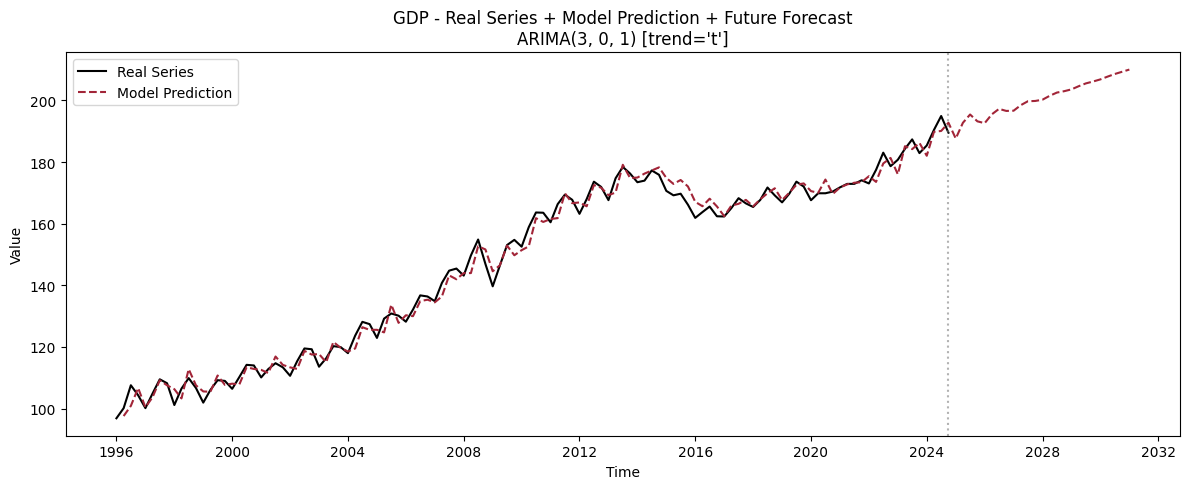


📈 Forecast:
2025-01-01    187.63
2025-04-01    192.72
2025-07-01    195.42
2025-10-01    193.21
2026-01-01    192.61
2026-04-01    195.47
2026-07-01    197.25
2026-10-01    196.58
2027-01-01    196.65
2027-04-01    198.44
2027-07-01    199.73
2027-10-01    199.82
2028-01-01    200.23
2028-04-01    201.50
2028-07-01    202.55
2028-10-01    202.99
2029-01-01    203.59
2029-04-01    204.60
2029-07-01    205.52
2029-10-01    206.14
2030-01-01    206.82
2030-04-01    207.72
2030-07-01    208.57
2030-10-01    209.27
2031-01-01    210.01
Freq: QS-OCT, Name: Out-of-sample Forecast, dtype: float64


In [38]:
# ---------- Manual ARIMA model ----------

model_gdp = ARIMA(serie_corrected, order=(3, 0, 1), trend='t')
fit_ipca = model_gdp.fit()

res = {
    'model': fit_ipca,
    'order': (3, 0, 1),
    'trend': 't'
}

serie = serie_corrected


# ---------- PART 1: In-sample prediction (train + test) ----------
in_sample_pred = res['model'].predict(start=serie.index[1], end=serie.index[-1])  # starts at second point
in_sample_pred.name = 'In-sample Prediction'

# ---------- PART 2: Forecast for the next 4 periods ----------
future_steps = 25
last_date = serie.index[-1]
freq = pd.infer_freq(serie.index) or 'Q'
offset = pd.tseries.frequencies.to_offset(freq)

future_index = pd.date_range(start=last_date + offset, periods=future_steps, freq=freq)
future_forecast = res['model'].forecast(steps=future_steps)
future_forecast.index = future_index
future_forecast.name = 'Out-of-sample Forecast'

# ---------- PART 3: Full prediction (entire series + 4 future periods) ----------
full_prediction = pd.concat([in_sample_pred, future_forecast])
full_series = pd.concat([serie, future_forecast])  # real series + future forecast

# ---------- PART 4: Unified plot ----------
plt.figure(figsize=(12, 5))

# Real series (black)
plt.plot(serie.index, serie.values, color='black', label='Real Series')

# Model prediction (in-sample + future), dashed
plt.plot(full_prediction.index, full_prediction.values, color=rgb_color, linestyle='--', label='Model Prediction')

# Vertical line marking the start of the future forecast
plt.axvline(x=serie.index[-1], color='gray', linestyle=':', alpha=0.6)

plt.title(f"{serie_name} - Real Series + Model Prediction + Future Forecast\nARIMA{res['order']} [trend='{res['trend']}']")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- Out-of-sample forecast values ----------
print("\n📈 Forecast:")
print(future_forecast.round(2))

In [39]:
# Here we estimate the model

model_full = ARIMA(serie, order=(3,0,1), trend='t')
fit_full = model_full.fit()

# Forecast the 4 quarters of 2025
forecast_2025 = fit_full.forecast( steps = 4)

# Last observed value (2024Q4)
gdp_2024_Q4 = serie.iloc[-1]

# Forecasted value for 2025Q4
gdp_2025_Q4 = forecast_2025.iloc[-1]

# Calculate GDP growth for 2025
delta_gdp = (gdp_2025_Q4 / gdp_2024_Q4) - 1

# ------------------ Final result

print("\n--- Final Result ---")
print(f"Observed GDP (2024Q4): {gdp_2024_Q4:.2f}")
print(f"Forecasted GDP (2025Q4): {gdp_2025_Q4:.2f}")
print(f"GDP growth in 2025: {delta_gdp:.2%}")


--- Final Result ---
Observed GDP (2024Q4): 189.51
Forecasted GDP (2025Q4): 193.21
GDP growth in 2025: 1.95%


In [40]:
# Here we estimate the model


# Estimate the model using all available data
model_full = ARIMA(serie, order=(3,0,1), trend='t')
fit_full = model_full.fit()

# Forecast 12 quarters ahead (2025 to 2027)
forecast = fit_full.forecast(steps=12)

# Last observed value (2024Q4)
gdp_2024_Q4 = serie.iloc[-1]

# Forecasted values for Q4 of each year
gdp_2025_Q4 = forecast.iloc[3]   # 4th forecasted quarter
gdp_2026_Q4 = forecast.iloc[7]   # 8th forecasted quarter
gdp_2027_Q4 = forecast.iloc[11]  # 12th forecasted quarter

# Calculate GDP growth for each year
growth_2025 = (gdp_2025_Q4 / gdp_2024_Q4) - 1
growth_2026 = (gdp_2026_Q4 / gdp_2025_Q4) - 1
growth_2027 = (gdp_2027_Q4 / gdp_2026_Q4) - 1

# ------------------ Final Results

print("\n--- Final Results ---")
print(f"Observed GDP (2024Q4): {gdp_2024_Q4:.2f}")
print(f"Forecasted GDP (2025Q4): {gdp_2025_Q4:.2f}")
print(f"Forecasted GDP (2026Q4): {gdp_2026_Q4:.2f}")
print(f"Forecasted GDP (2027Q4): {gdp_2027_Q4:.2f}")

print(f"\nGDP growth in 2025: {growth_2025:.2%}")
print(f"GDP growth in 2026: {growth_2026:.2%}")
print(f"GDP growth in 2027: {growth_2027:.2%}")


--- Final Results ---
Observed GDP (2024Q4): 189.51
Forecasted GDP (2025Q4): 193.21
Forecasted GDP (2026Q4): 196.58
Forecasted GDP (2027Q4): 199.82

GDP growth in 2025: 1.95%
GDP growth in 2026: 1.75%
GDP growth in 2027: 1.65%


===============================================================================================================


All model results sorted by AIC:

ARIMA(4, 0, 5) [trend='t'] - AIC: 2881.5 | BIC: 2924.3 | HQIC: 2898.51 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(4, 0, 5) [trend='ct'] - AIC: 2884.3 | BIC: 2931.0 | HQIC: 2902.86 | Ljung-Box p: 0.9999 → ✅ White noise
ARIMA(4, 0, 4) [trend='ct'] - AIC: 2885.33 | BIC: 2928.14 | HQIC: 2902.35 | Ljung-Box p: 0.9996 → ✅ White noise
ARIMA(2, 0, 5) [trend='ct'] - AIC: 2886.37 | BIC: 2925.28 | HQIC: 2901.84 | Ljung-Box p: 0.9999 → ✅ White noise
ARIMA(4, 0, 4) [trend='t'] - AIC: 2886.41 | BIC: 2925.33 | HQIC: 2901.88 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(3, 0, 4) [trend='ct'] - AIC: 2888.41 | BIC: 2927.32 | HQIC: 2903.88 | Ljung-Box p: 0.9999 → ✅ White noise
ARIMA(2, 0, 5) [trend='t'] - AIC: 2889.51 | BIC: 2924.53 | HQIC: 2903.43 | Ljung-Box p: 1.0000 → ✅ White noise
ARIMA(2, 0, 4) [trend='ct'] - AIC: 2890.82 | BIC: 2925.84 | HQIC: 2904.74 | Ljung-Box p: 0.9996 → ✅ White noise
ARIMA(3, 0, 5) [trend='t'] - AIC: 2892.97 | BIC: 2931.89 | HQIC: 2908.44 | L

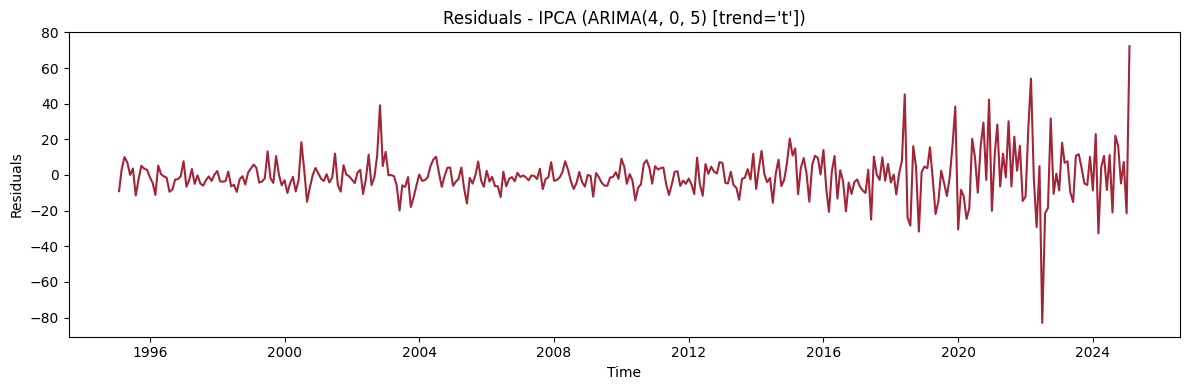

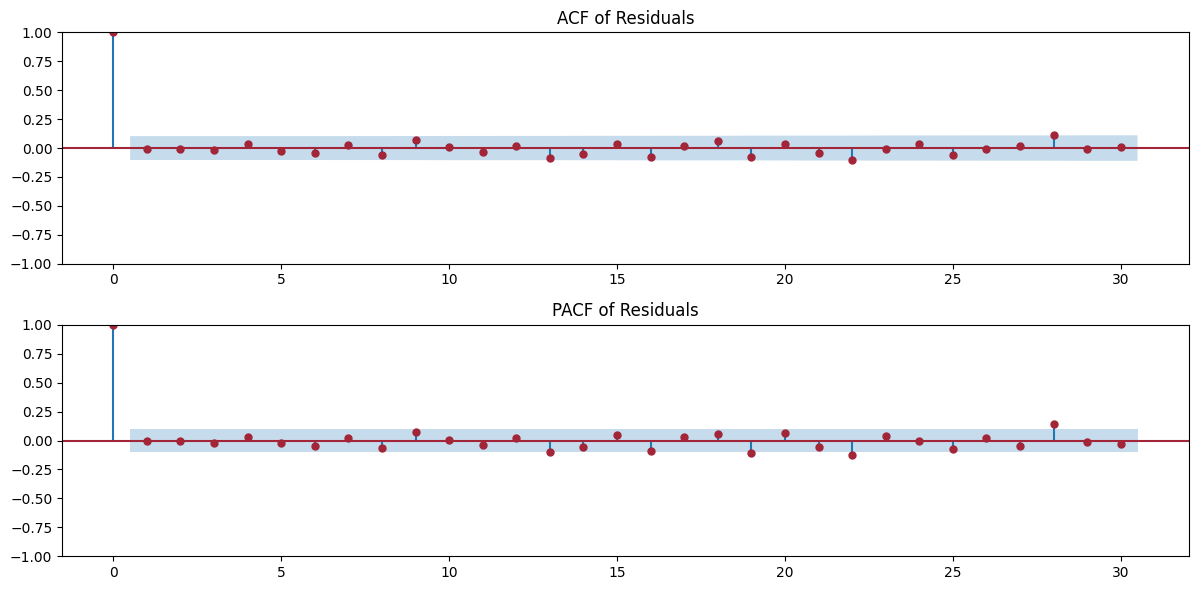


Ljung-Box p-value (lag 10): 1.0000
✅ Residuals are white noise.


In [63]:
# ----- SERIES PREPARATION -----

serie_name = 'IPCA'
train_perc = 1  # ajuste se quiser fazer split depois

serie = ipca[serie_name].dropna().copy()
serie.index = pd.to_datetime(serie.index, utc=True).tz_localize(None)
serie_corrected = serie.copy()

# ----- DEFINE CRITICAL PERIODS TO INTERPOLATE -----

critical_periods = pd.to_datetime([
    "2020-04-01 00:00:00",
    "2020-07-01 00:00:00",
    "2020-10-01 00:00:00",
    "2021-01-01 00:00:00",
    "2021-04-01 00:00:00",
    "2021-07-01 00:00:00",
    "2021-10-01 00:00:00",
])

X = 2  # Number of periods before and after to use in smoothing

# ----- SEQUENTIAL SMOOTHING OF CRITICAL PERIODS -----

for period in sorted(critical_periods):
    if period in serie_corrected.index:
        pos = serie_corrected.index.get_loc(period)
        if pos - X >= 0 and pos + X < len(serie_corrected):
            avg_before = serie_corrected.iloc[pos - X:pos].mean()
            avg_after = serie_corrected.iloc[pos + 1:pos + X + 1].mean()
            corrected_value = (avg_before + avg_after) / 2
            # Atualiza usando .loc para garantir que o valor seja substituído corretamente
            serie_corrected.loc[period] = corrected_value

# -----------------------------
# Dectecting the order of ARIMA model using ACF and PACF plots
# -----------------------------

# Split data
split_index = int(len(serie_corrected) * train_perc)
train = serie_corrected.iloc[:split_index]
test = serie_corrected.iloc[split_index:]

# Candidate params
p_values = [2, 3, 4]
d_values = [0]  # Only d=0 to allow trends
q_values = [4, 5]
trend_types = ['c', 't','ct']

# Estimate models
results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            for trend_type in trend_types:
                # Skip invalid trend combinations for given d
                if d == 1 and trend_type in ['c', 'ct']:
                    continue
                elif d >= 2 and trend_type != 'n':
                    continue
                try:
                    model = ARIMA(train, order=(p, d, q), trend=trend_type).fit()
                    residuals = model.resid.dropna()
                    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
                    p_value = lb_test['lb_pvalue'].iloc[0]
                    white_noise = p_value > 0.05
                    results.append({
                        'order': (p, d, q),
                        'trend': trend_type,
                        'aic': model.aic,
                        'bic': model.bic,
                        'hqic': model.hqic,
                        'ljung_pvalue': p_value,
                        'white_noise': white_noise,
                        'model': model
                    })
                except Exception as e:
                    print(f"Error fitting ARIMA({p},{d},{q}) with trend='{trend_type}': {e}")



# Print all models
print("\nAll model results sorted by AIC:\n")
for res in sorted(results, key=lambda x: x['aic']):
    status = "✅ White noise" if res['white_noise'] else "⚠️ Autocorr."
    print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
          f"AIC: {round(res['aic'], 2)} | BIC: {round(res['bic'], 2)} | "
          f"HQIC: {round(res['hqic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} → {status}")

# Filter only valid models (white noise)
valid_results = [res for res in results if res['white_noise']]

if not valid_results:
    print("\n⚠️ No model passed the white noise residual test (Ljung-Box p > 0.05 at lag 10).")
else:
    print("\n✅ Models with white noise residuals sorted by AIC:\n")
    for res in sorted(valid_results, key=lambda x: x['aic']):
        print(f"ARIMA{res['order']} [trend='{res['trend']}'] - "
              f"AIC: {round(res['aic'], 2)} | Ljung-Box p: {res['ljung_pvalue']:.4f} ✅")

    # Best models from valid ones
    best_aic_model = min(valid_results, key=lambda x: x['aic'])
    best_bic_model = min(valid_results, key=lambda x: x['bic'])
    best_hqic_model = min(valid_results, key=lambda x: x['hqic'])

    print("\n--- Best models (with white noise residuals) per criterion ---")
    print(f"Lowest AIC   -> ARIMA{best_aic_model['order']} [trend='{best_aic_model['trend']}']")
    print(f"Lowest BIC   -> ARIMA{best_bic_model['order']} [trend='{best_bic_model['trend']}']")
    print(f"Lowest HQIC  -> ARIMA{best_hqic_model['order']} [trend='{best_hqic_model['trend']}']")

    # Consensus check
    consensus_models = [
        (best_aic_model['order'], best_aic_model['trend']),
        (best_bic_model['order'], best_bic_model['trend']),
        (best_hqic_model['order'], best_hqic_model['trend'])
    ]
    counts = Counter(consensus_models)
    most_common_model, freq = counts.most_common(1)[0]

    if freq > 1:
        print(f"\n🏆 The model ARIMA{most_common_model[0]} [trend='{most_common_model[1]}'] is the best in {freq}/3 criteria.")
        for res in valid_results:
            if res['order'] == most_common_model[0] and res['trend'] == most_common_model[1]:
                print("\n--- Summary of the most common best model ---")
                print(res['model'].summary())

                # Residual plot
                residuals = res['model'].resid.dropna()[1:]
                plt.figure(figsize=(12, 4))
                plt.plot(residuals, color=rgb_color)
                plt.title(f"Residuals - {serie_name} (ARIMA{res['order']} [trend='{res['trend']}'])")
                plt.xlabel("Time")
                plt.ylabel("Residuals")
                plt.tight_layout()
                plt.show()

                # ACF/PACF
                fig, axs = plt.subplots(2, 1, figsize=(12, 6))
                plot_acf(residuals, lags=30, ax=axs[0], color=rgb_color)
                axs[0].set_title("ACF of Residuals")
                plot_pacf(residuals, lags=30, ax=axs[1], color=rgb_color)
                axs[1].set_title("PACF of Residuals")
                plt.tight_layout()
                plt.show()

                # Ljung-Box result
                print(f"\nLjung-Box p-value (lag 10): {res['ljung_pvalue']:.4f}")
                print("✅ Residuals are white noise.")
    else:
        print("\nNo single model dominates in all criteria among valid models.")

In [ ]:
# Forecast and growth calculation for each valid model (assuming splited the data for training)
forecasts = []
steps = len(test)

for res in valid_results:
    try:
        model = ARIMA(train, order=res['order'], trend=res['trend']).fit()
        forecast_ = model.forecast(steps=steps)

        # Last observed value from training data
        last_obs = train.iloc[-1]
        last_forecast = forecast_.iloc[-1]

        growth = (last_forecast / last_obs) - 1

        forecasts.append({
            'order': res['order'],
            'trend': res['trend'],
            'forecast': forecast_,
            'growth': growth
        })

    except Exception as e:
        print(f"Error forecasting with ARIMA{res['order']} [trend='{res['trend']}']: {e}")


print("\n📊 Forecast and Growth Summary (Out-of-Sample):\n")
for item in forecasts:
    print(f"ARIMA{item['order']} [trend='{item['trend']}']:")  
    print(f"→ Forecast (last value): {item['forecast'].iloc[-1]:.2f}")
    print(f"→ Projected growth: {item['growth']:.2%}")
    print("-" * 40)

In [64]:
# Forecast and growth calculation for each valid model (assuming no split the data for training)
forecasts = []

for res in valid_results:
    try:
        # Fit the model on the full series
        model = ARIMA(serie, order=res['order'], trend=res['trend']).fit()

        # Forecast for the next periods
        forecast_ = model.forecast(steps = 10 )

        # Last observed value
        last_obs = serie.iloc[-3]

        # Last forecasted value
        last_pred = forecast_.iloc[-1]

        # Calculate growth rate between last observed and final forecasted value
        growth = (last_pred / last_obs) - 1

        # Store results
        forecasts.append({
            'order': res['order'],
            'trend': res['trend'],
            'forecast': forecast_,
            'growth': growth
        })

    except Exception as e:
        print(f"Error forecasting with ARIMA{res['order']} [trend='{res['trend']}']: {e}")

# Print results
print("\n📊 Forecast and Growth Summary (White Noise Models Only):\n")
for item in forecasts:
    print(f"ARIMA{item['order']} [trend='{item['trend']}']:")
    print(item['forecast'].round(2))
    print(f"Projected growth: {item['growth']:.2%}")
    print("-" * 40)


📊 Forecast and Growth Summary (White Noise Models Only):

ARIMA(2, 0, 4) [trend='c']:
2025-03-01    7270.04
2025-04-01    7319.04
2025-05-01    7348.02
2025-06-01    7350.29
2025-07-01    7347.66
2025-08-01    7349.87
2025-09-01    7347.30
2025-10-01    7349.46
2025-11-01    7346.94
2025-12-01    7349.04
Freq: MS, Name: predicted_mean, dtype: float64
Projected growth: 3.50%
----------------------------------------
ARIMA(2, 0, 4) [trend='t']:
2025-03-01    7264.86
2025-04-01    7314.03
2025-05-01    7356.63
2025-06-01    7388.04
2025-07-01    7419.07
2025-08-01    7449.74
2025-09-01    7480.05
2025-10-01    7509.99
2025-11-01    7539.58
2025-12-01    7568.83
Freq: MS, Name: predicted_mean, dtype: float64
Projected growth: 6.60%
----------------------------------------
ARIMA(2, 0, 4) [trend='ct']:
2025-03-01    7261.75
2025-04-01    7307.13
2025-05-01    7341.30
2025-06-01    7360.87
2025-07-01    7375.38
2025-08-01    7394.93
2025-09-01    7409.47
2025-10-01    7428.99
2025-11-01    74

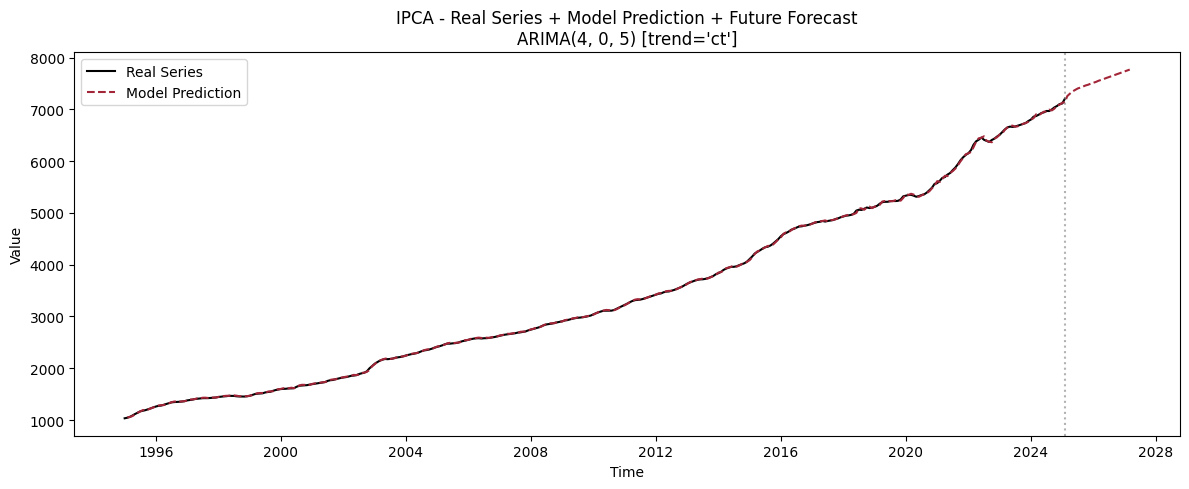


📈 Forecast:
2025-03-01    7255.50
2025-04-01    7302.48
2025-05-01    7344.92
2025-06-01    7373.54
2025-07-01    7402.19
2025-08-01    7419.05
2025-09-01    7439.43
2025-10-01    7460.34
2025-11-01    7475.24
2025-12-01    7495.97
2026-01-01    7514.09
2026-02-01    7530.25
2026-03-01    7550.91
2026-04-01    7567.65
2026-05-01    7585.39
2026-06-01    7605.20
2026-07-01    7621.62
2026-08-01    7640.45
2026-09-01    7659.19
2026-10-01    7676.01
2026-11-01    7695.27
2026-12-01    7713.15
2027-01-01    7730.67
2027-02-01    7749.80
2027-03-01    7767.26
Freq: MS, Name: Out-of-sample Forecast, dtype: float64


In [65]:
# ---------- Manual ARIMA model ----------

model = ARIMA(serie, order= (4, 0, 5), trend='ct')
fit_ipca = model.fit()

res = {
    'model': fit_ipca,
    'order': (4, 0, 5),
    'trend': 'ct'
}



# ---------- PART 1: In-sample prediction (train + test) ----------
in_sample_pred = res['model'].predict(start=serie.index[1], end=serie.index[-1])  # starts at second point
in_sample_pred.name = 'In-sample Prediction'

# ---------- PART 2: Forecast for the next 4 periods ----------
future_steps = 25
last_date = serie.index[-1]
freq = pd.infer_freq(serie.index) or 'Q'
offset = pd.tseries.frequencies.to_offset(freq)

future_index = pd.date_range(start=last_date + offset, periods=future_steps, freq=freq)
future_forecast = res['model'].forecast(steps=future_steps)
future_forecast.index = future_index
future_forecast.name = 'Out-of-sample Forecast'

# ---------- PART 3: Full prediction (entire series + 4 future periods) ----------
full_prediction = pd.concat([in_sample_pred, future_forecast])
full_series = pd.concat([serie, future_forecast])  # real series + future forecast

# ---------- PART 4: Unified plot ----------
plt.figure(figsize=(12, 5))

# Real series (black)
plt.plot(serie.index, serie.values, color='black', label='Real Series')

# Model prediction (in-sample + future), dashed
plt.plot(full_prediction.index, full_prediction.values, color=rgb_color, linestyle='--', label='Model Prediction')

# Vertical line marking the start of the future forecast
plt.axvline(x=serie.index[-1], color='gray', linestyle=':', alpha=0.6)

plt.title(f"{serie_name} - Real Series + Model Prediction + Future Forecast\nARIMA{res['order']} [trend='{res['trend']}']")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- Out-of-sample forecast values ----------
print("\n📈 Forecast:")
print(future_forecast.round(2))

In [72]:
# Here we estimate the model


model_full = ARIMA(serie, order=(4, 0, 5), trend='ct')
fit_full = model_full.fit()


forecast_2025 = fit_full.forecast( steps = 10)

# Last observed value (Dec 2024)
ipca_2024_Dec = serie.iloc[-3]

# Forecasted value for Dec 2025
ipca_2025_Dec = forecast_2025.iloc[-1]

# Calculate inflation for 2025
delta_ipca = (ipca_2025_Dec / ipca_2024_Dec) - 1

# ------------------ Final result

print("\n--- Final Result ---")
print(f"Observed IPCA (Dec 2024): {ipca_2024_Dec:.2f}")
print(f"Forecasted IPCA (Dec 2025): {ipca_2025_Dec:.2f}")
print(f"Inflation in 2025: {delta_ipca:.2%}")


--- Final Result ---
Observed IPCA (Dec 2024): 7100.50
Forecasted IPCA (Dec 2025): 7495.97
Inflation in 2025: 5.57%


In [74]:
# Here we estimate the model

# Estimate the model using all available data
serie_ipca = ipca["IPCA"].astype(float).dropna().sort_index()
model_ipca = ARIMA(serie_ipca, order=(4, 0, 5), trend='ct')
fit_ipca = model_ipca.fit()

# Forecast 36 months ahead (from March 2025 onward)
forecast_steps = 36
forecast_ipca = fit_ipca.forecast(steps=forecast_steps)

# Last observed value (Feb 2025)
ipca_feb_2025 = serie_ipca.iloc[-3]

# Get forecasted values for Dec/2025, Dec/2026, Dec/2027
ipca_dec_2025 = forecast_ipca.iloc[9]   # 10th forecasted month = Dec 2025
ipca_dec_2026 = forecast_ipca.iloc[20]  # 21st forecasted month = Dec 2026
ipca_dec_2027 = forecast_ipca.iloc[31]  # 32nd forecasted month = Dec 2027

# Calculate inflation between years
inflation_2025 = (ipca_dec_2025 / ipca_feb_2025) - 1
inflation_2026 = (ipca_dec_2026 / ipca_dec_2025) - 1
inflation_2027 = (ipca_dec_2027 / ipca_dec_2026) - 1

# ------------------ Final Results
print("\n--- Final Results ---")
print(f"Observed IPCA (Feb 2025): {ipca_feb_2025:.2f}")
print(f"Forecasted IPCA (Dec 2025): {ipca_dec_2025:.2f}")
print(f"Forecasted IPCA (Dec 2026): {ipca_dec_2026:.2f}")
print(f"Forecasted IPCA (Dec 2027): {ipca_dec_2027:.2f}")

print(f"\nInflation from Feb to Dec 2025: {inflation_2025:.2%}")
print(f"Inflation in 2026: {inflation_2026:.2%}")
print(f"Inflation in 2027: {inflation_2027:.2%}")




--- Final Results ---
Observed IPCA (Feb 2025): 7100.50
Forecasted IPCA (Dec 2025): 7495.97
Forecasted IPCA (Dec 2026): 7695.27
Forecasted IPCA (Dec 2027): 7894.68

Inflation from Feb to Dec 2025: 5.57%
Inflation in 2026: 2.66%
Inflation in 2027: 2.59%
